In [1]:
#IMPORTING ALL THE NECESSARY LIBRARIES FOR OUR PROJECT

#Note---HOUSE PRICE PREDICTION IS A CLASSICAL REGRESSION PROBLEMN

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,recall_score,accuracy_score,precision_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder


pd.pandas.set_option("display.max_columns",None)

In [2]:
#READING THE CSV FILE INTO OUR NOTEBOOK

df=pd.read_csv('/Users/lakshyamittal/Downloads/train (1).csv')
print(df.shape)
print(type(df))

(1460, 81)
<class 'pandas.core.frame.DataFrame'>


In [3]:
# "Id"---unimportant feature as it plays no meaningful role in prediction.So we can drop the feature permanently from our dataset
df.drop("Id",axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [6]:
#SEGREGATING THE ENTIRE DATASET'S FETURES(INDEPENDENT_FEATURES) INTO NUMERICAL_COLUMNS AND CATEGORICAL_COLUMNS
#THIS MAKES IT EASY TO DO FEATURE ENGINEERING AND EDA ALSO TO HANDLE MISSING VALUES

numerical_columns=[features for features in df.columns if df[features].dtype!="object"]
numerical_columns_with_na=[features for features in numerical_columns if df[features].isnull().sum()>1]

categorical_columns=[features for features in df.columns if df[features].dtype=="object"]
categorical_columns_with_na=[features for features in categorical_columns if df[features].isnull().sum()>1]

In [7]:
columns_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
columns_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

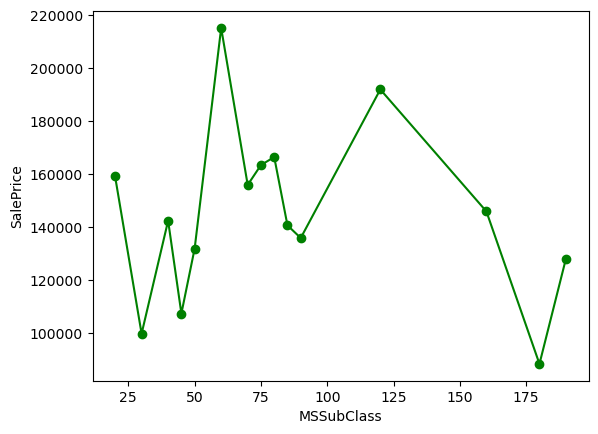

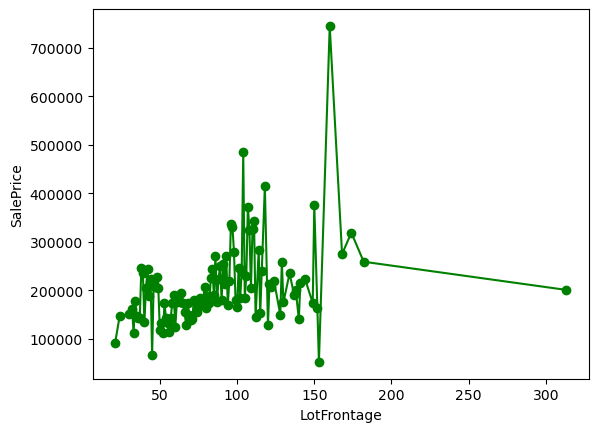

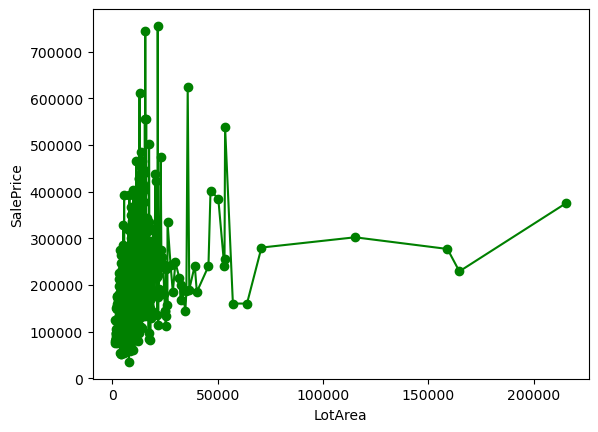

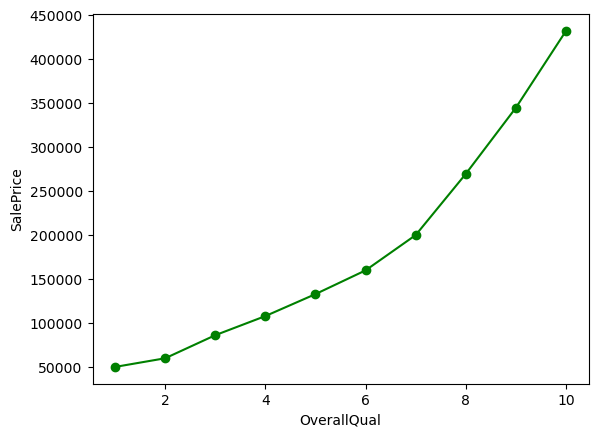

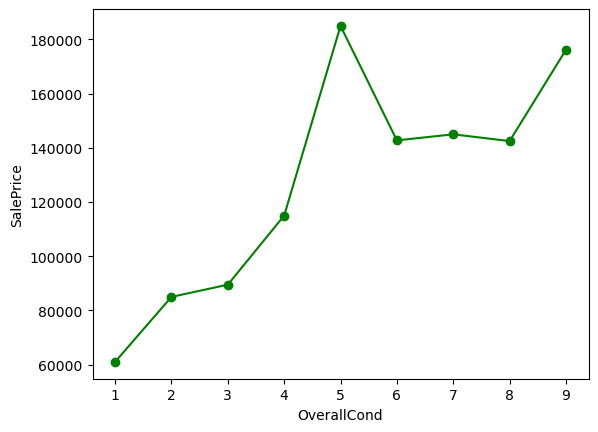

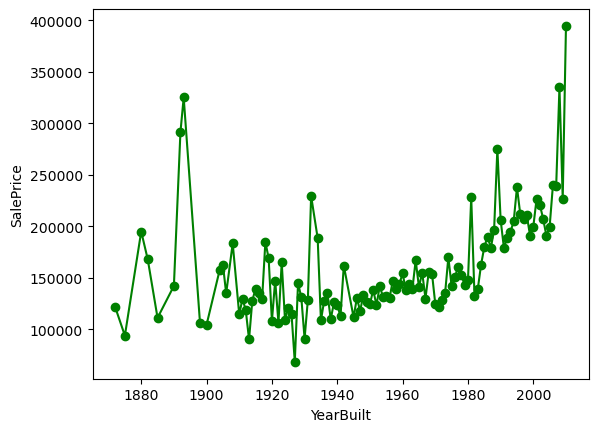

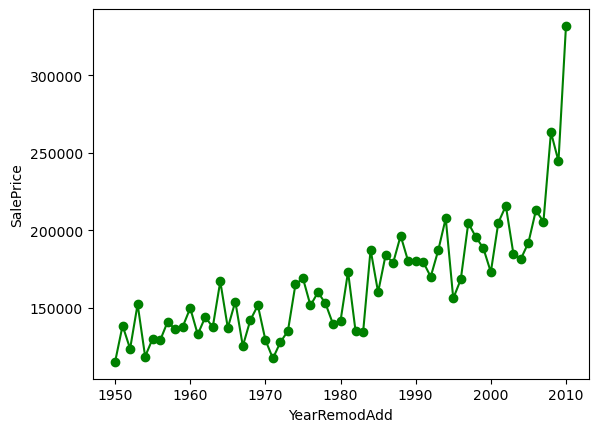

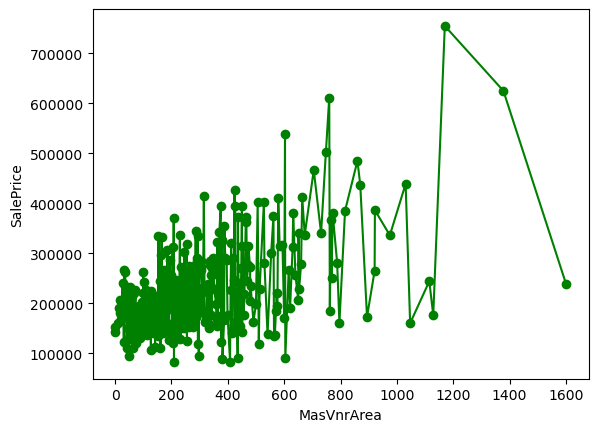

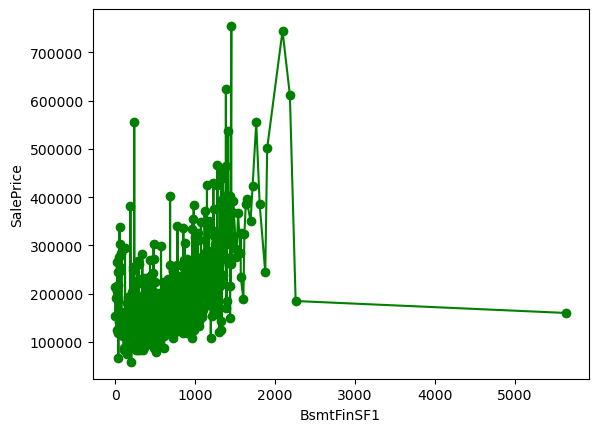

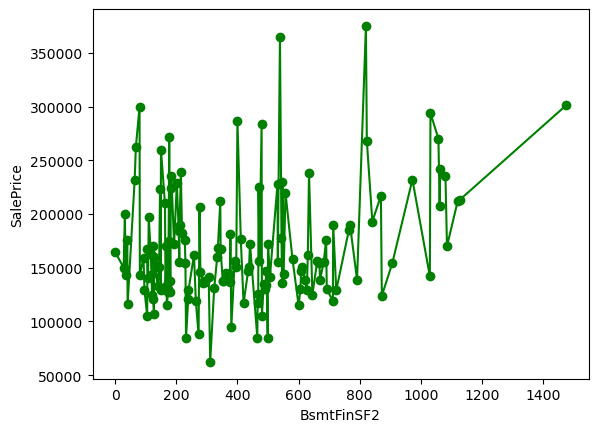

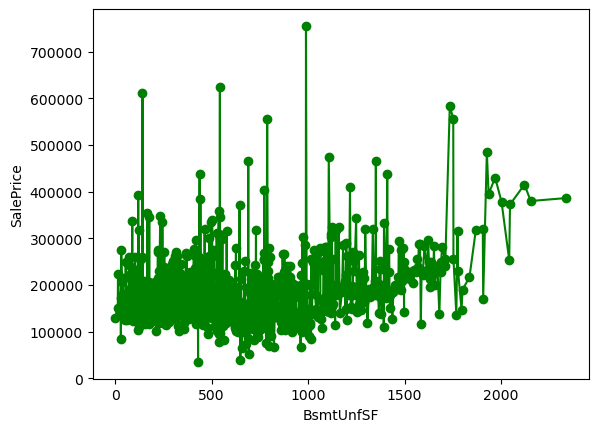

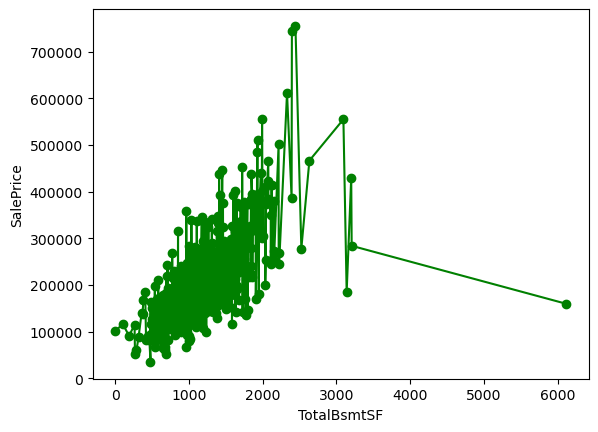

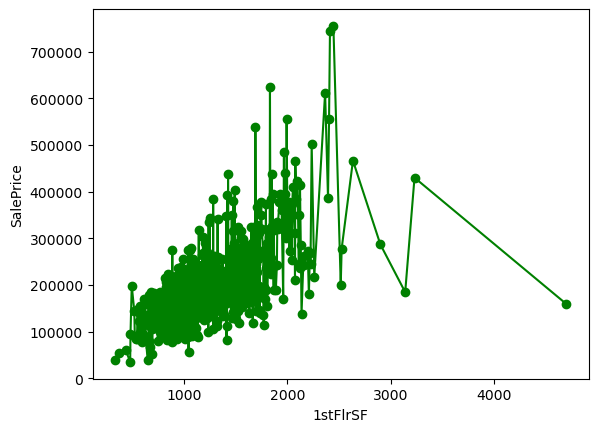

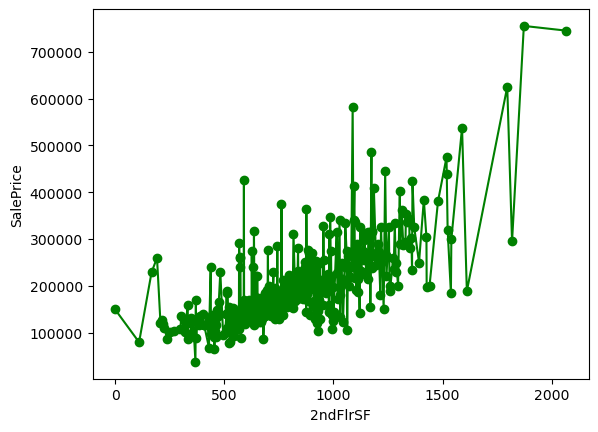

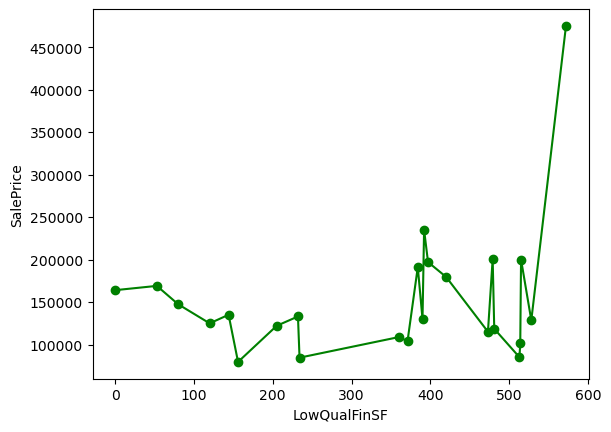

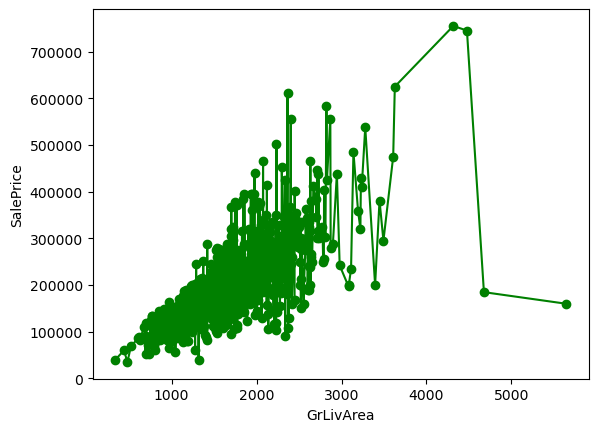

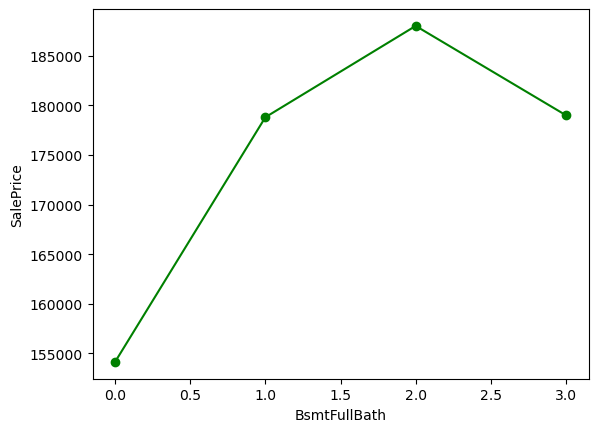

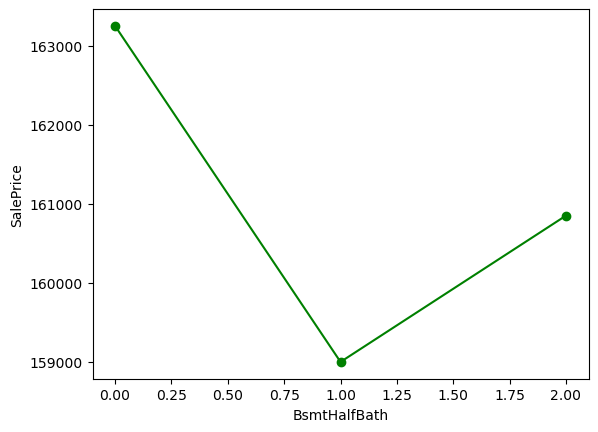

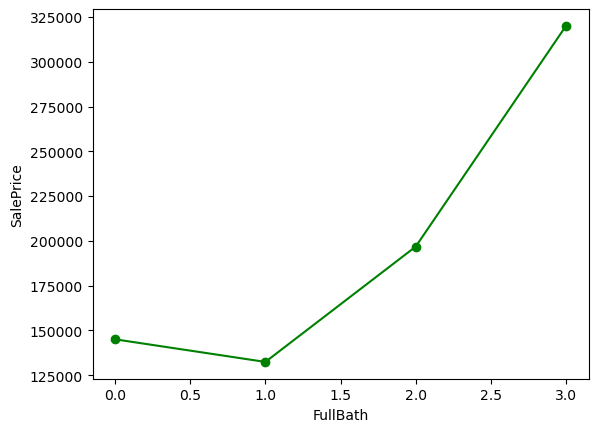

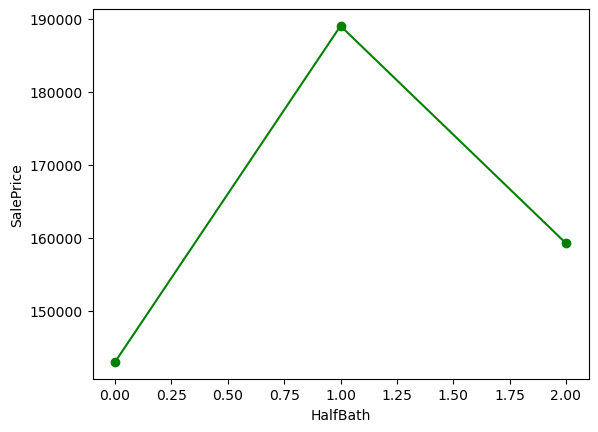

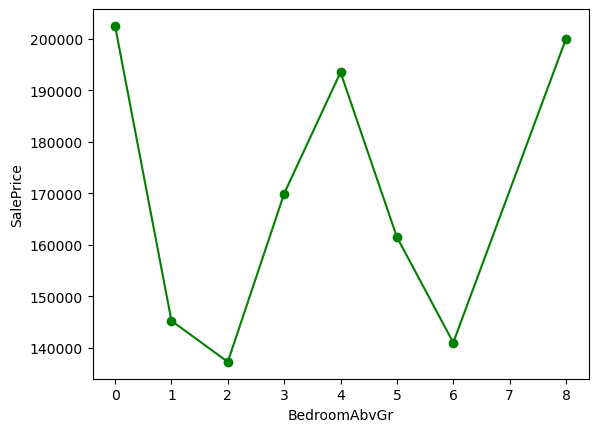

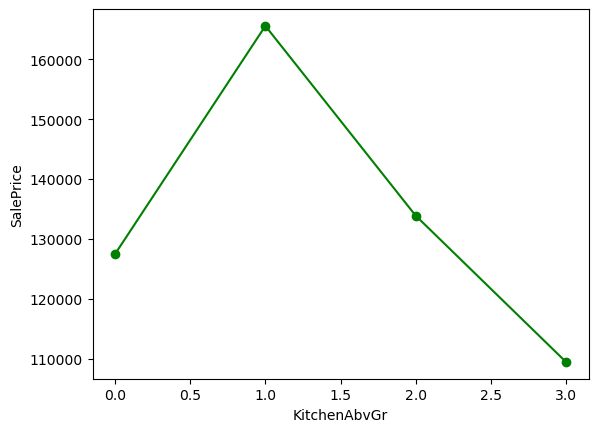

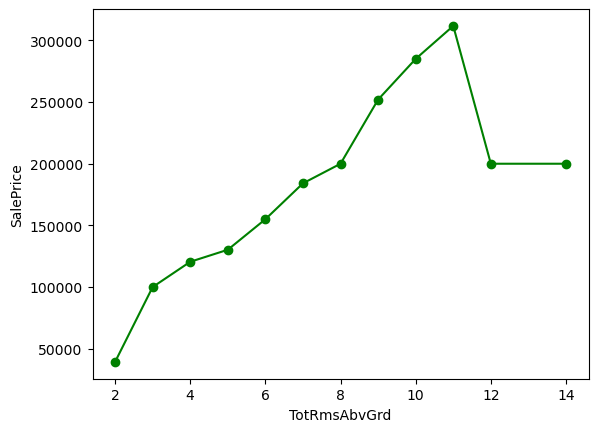

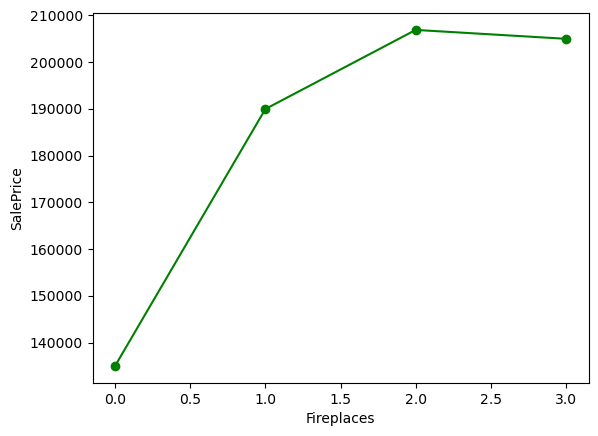

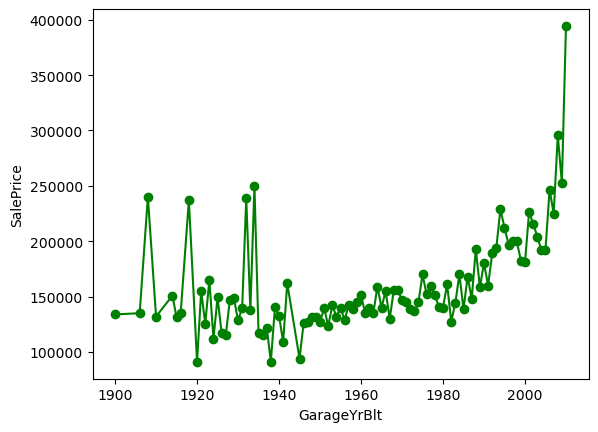

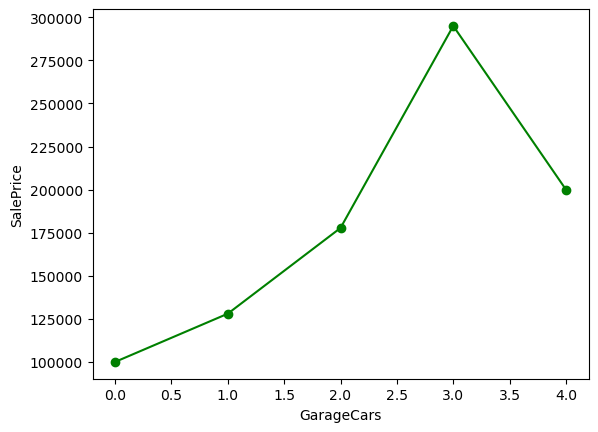

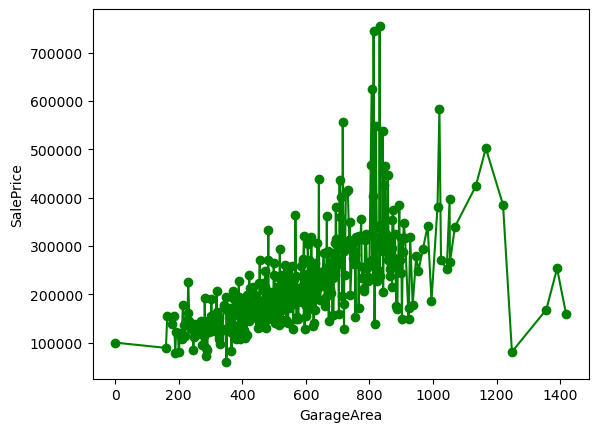

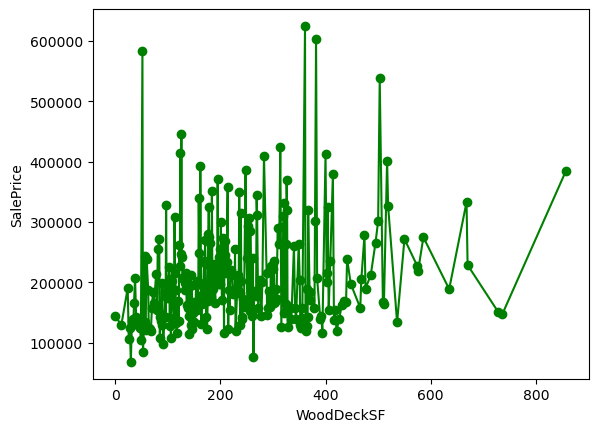

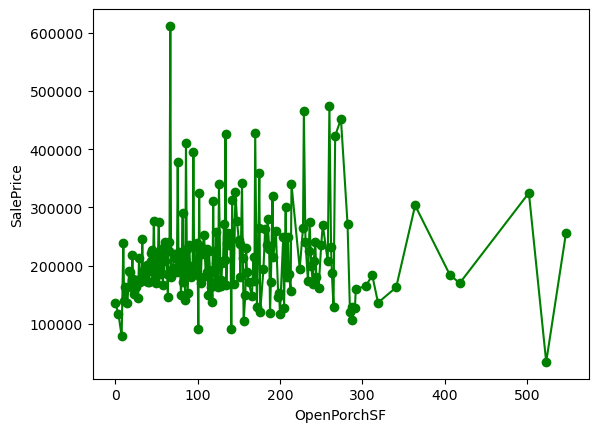

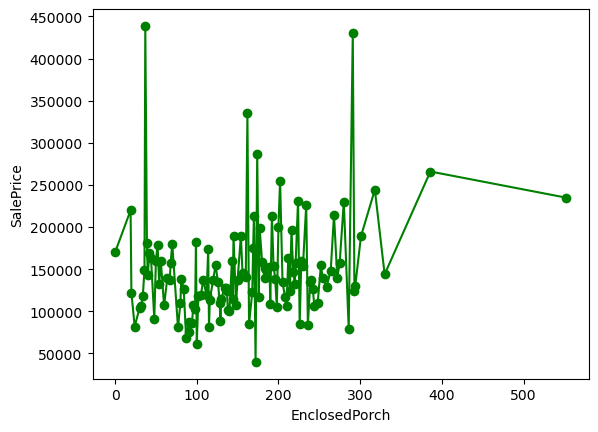

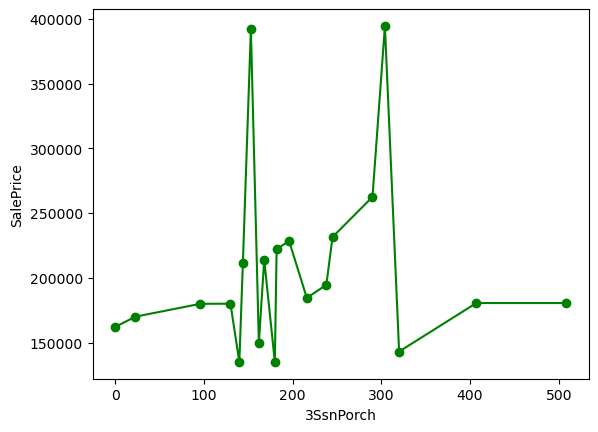

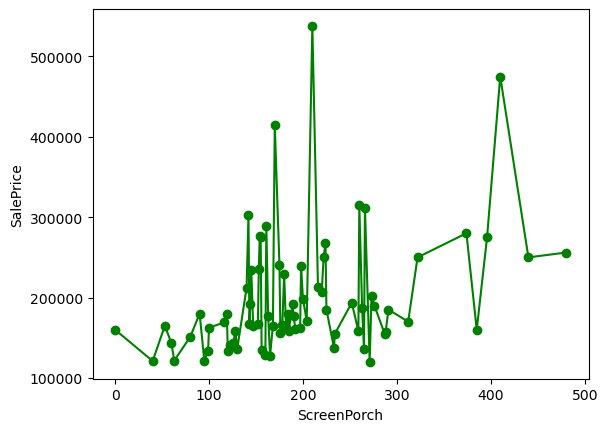

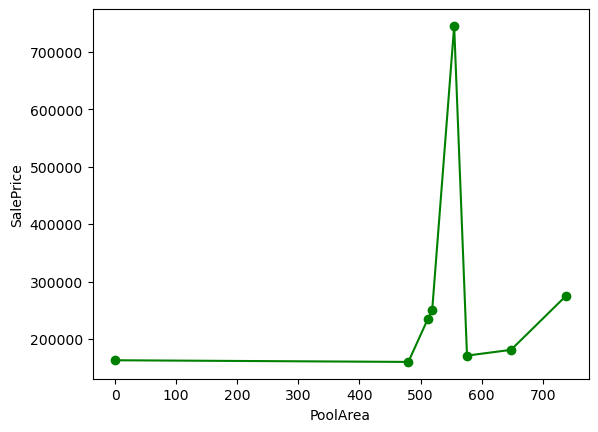

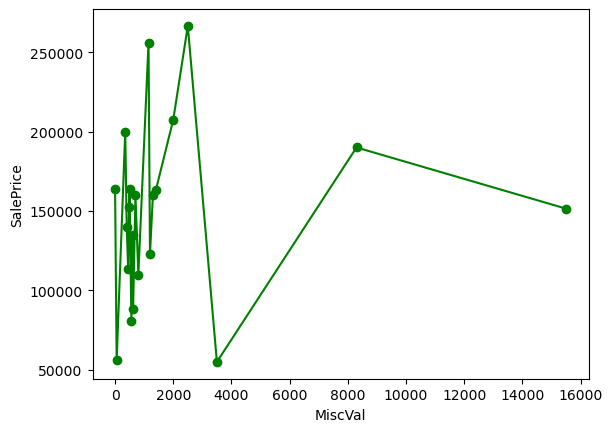

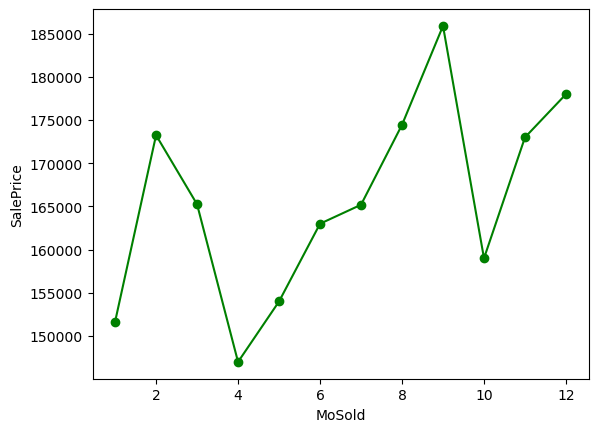

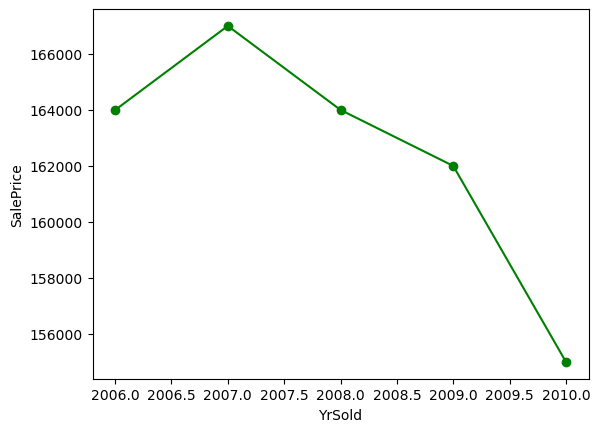

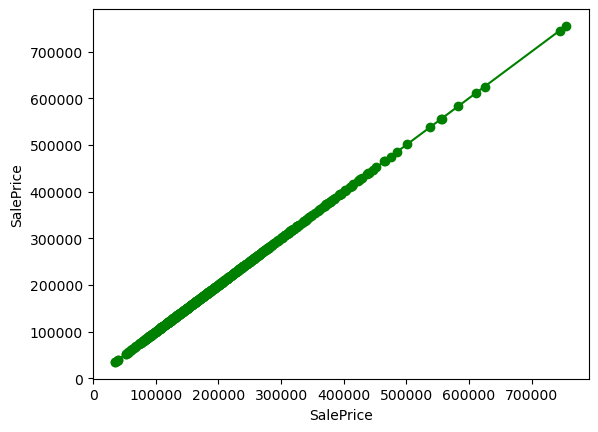

In [8]:
#LINE PLOT FOR OUR NUMERICAL_FEATURES

for feature in numerical_columns:
    df.groupby(feature)["SalePrice"].median().plot(color="green",marker="o")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

In [9]:
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [11]:
numerical_columns_with_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [12]:
categorical_columns_with_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

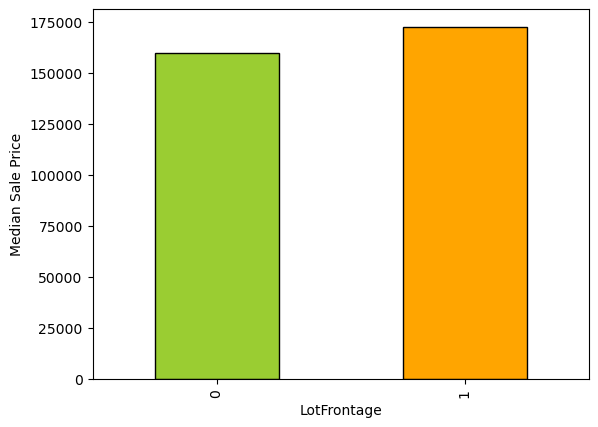

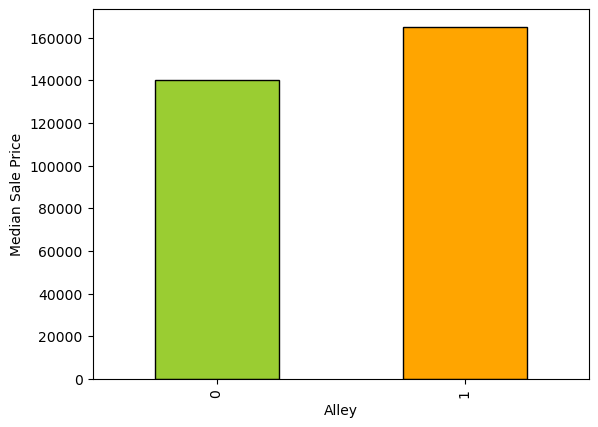

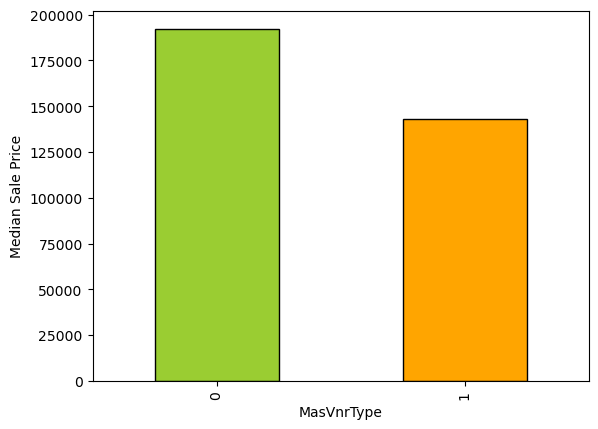

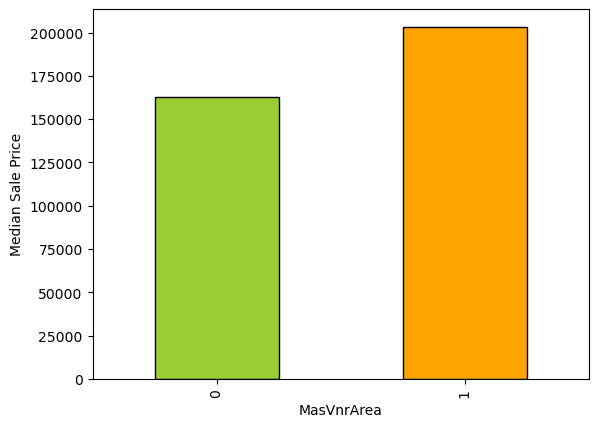

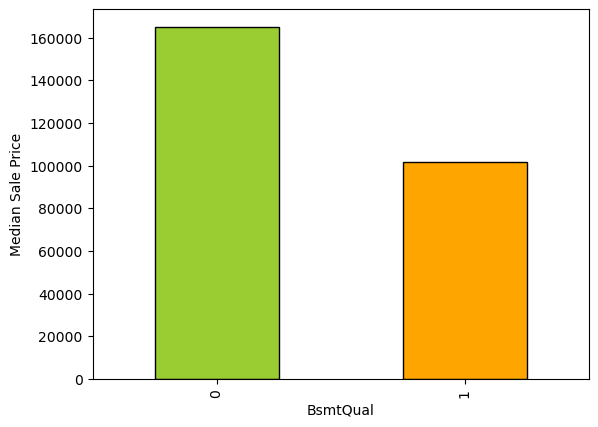

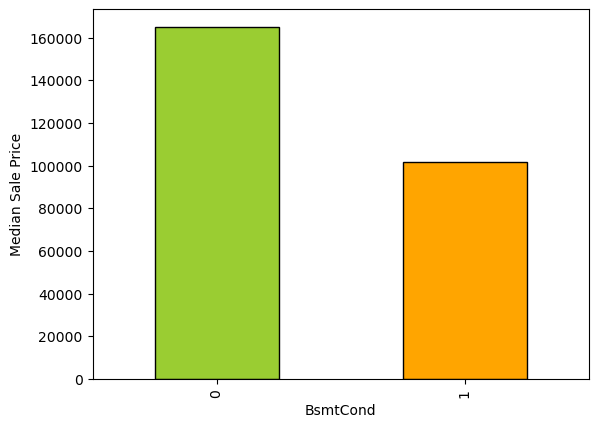

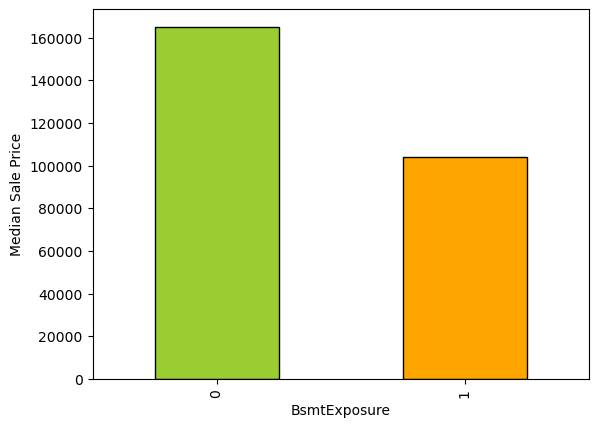

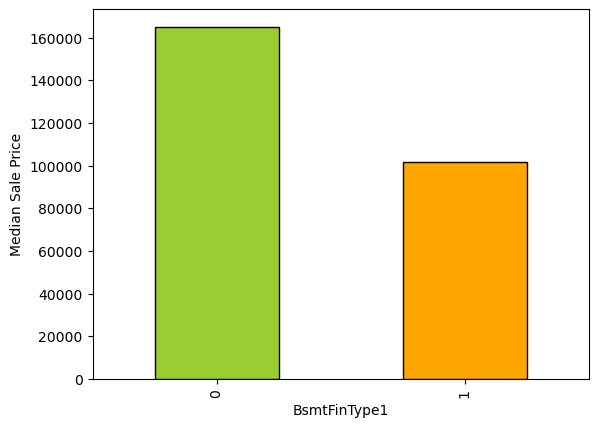

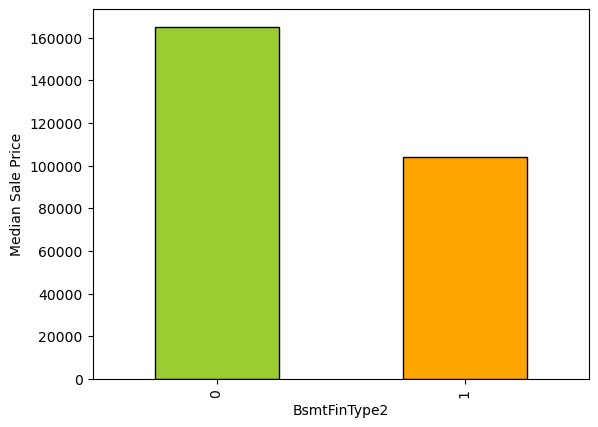

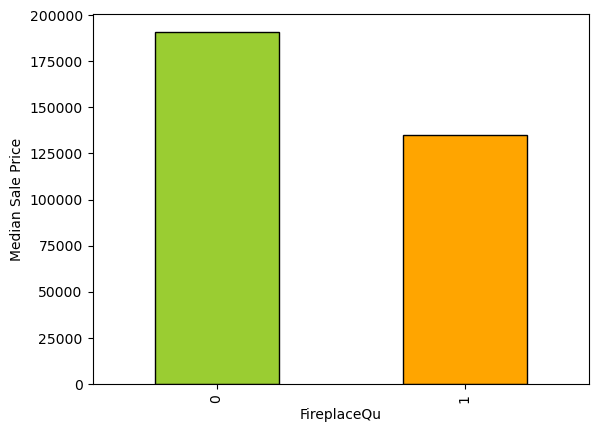

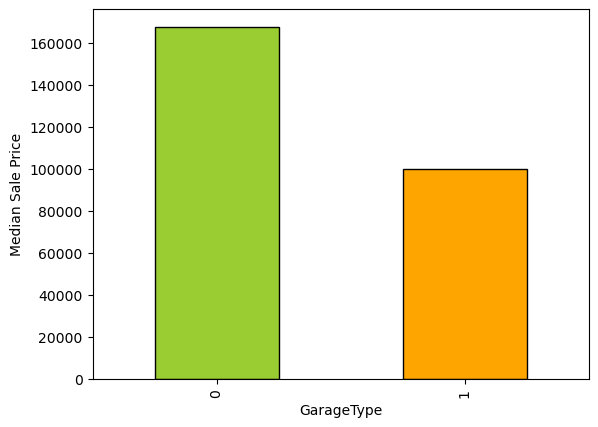

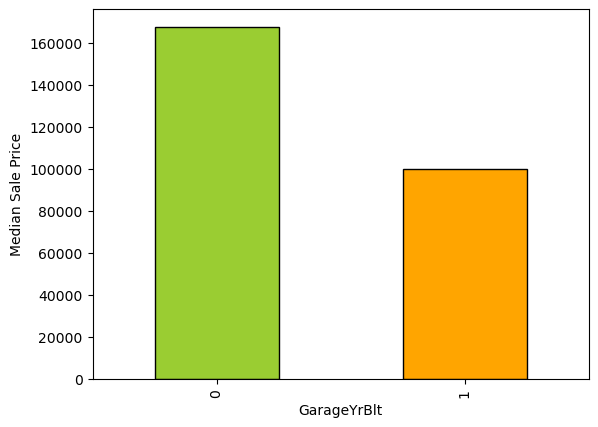

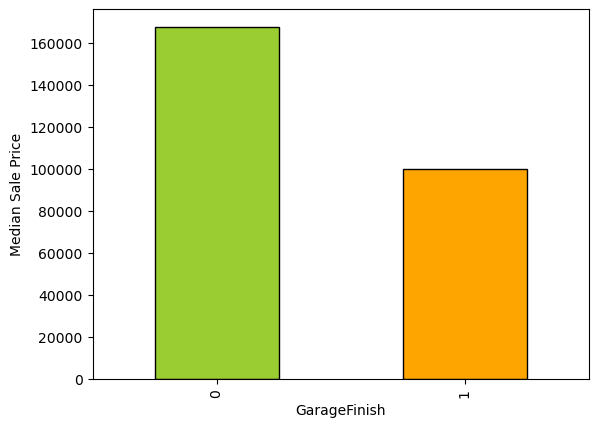

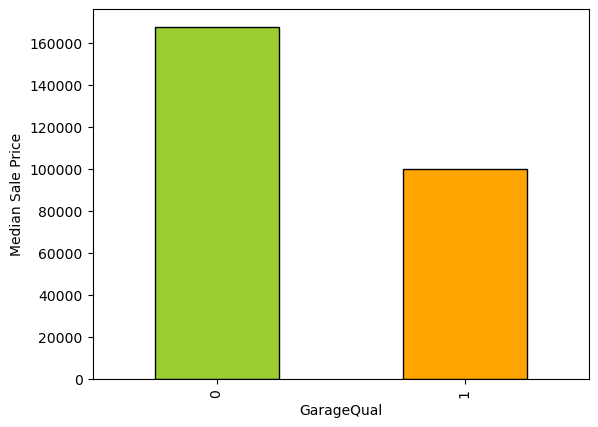

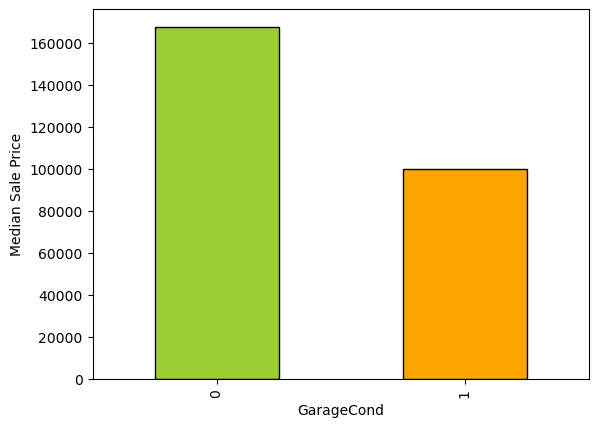

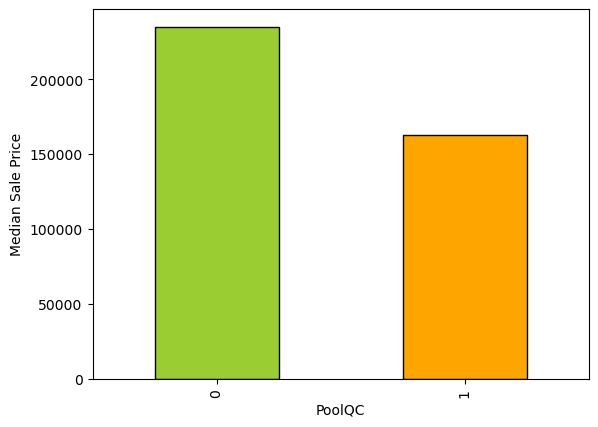

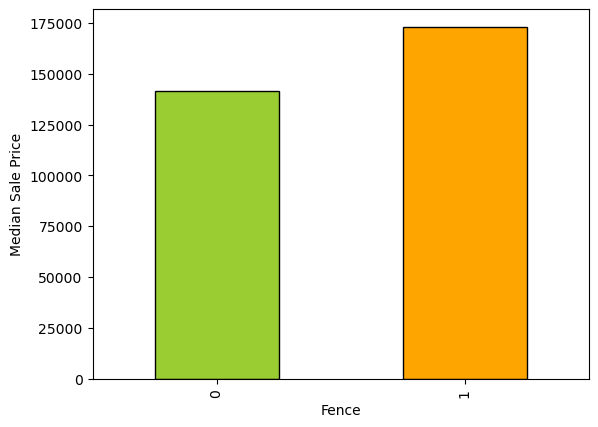

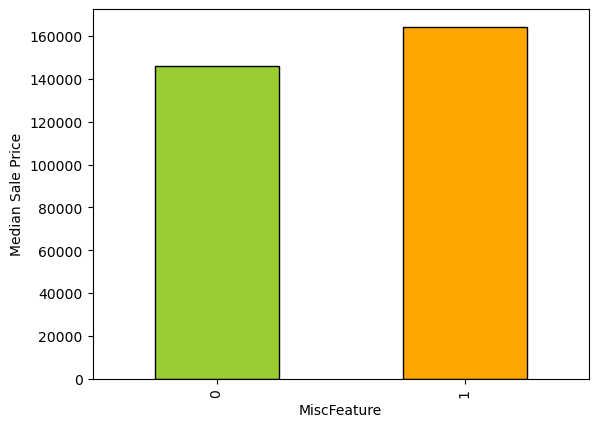

In [13]:
#CHECKING THE IMPORTANCE OF NaN VALUES IN OUR NUMERICAL_COLUMNS IN DETERMINING OUR SALEPRICE
#WE WILL PLOT BARGRAPHS

for feature in columns_with_na:
    df_copy=df.copy()
    df_copy[feature]=np.where(df[feature].isnull(),1,0)  #WHEREVER WE HAVE NaN VALUE WE REPLACE IT WITH 1 ELSE 0 AND FOR THESE TWO CATEGORIES WE PLOT BAR_GRAPHS
    df_copy.groupby(feature)["SalePrice"].median().plot.bar(color=["yellowgreen","orange"],edgecolor="black")
    plt.xlabel(feature)
    plt.ylabel("Median Sale Price")
    plt.show()

In [14]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [15]:
#WE HAVE ALSO SEPARATED OUT YEAR_FEATURES FROM OUR DATASET TO DO MODIFICATIONS ON THE YEAR RELATED COLUMNS
#ABSOLUTE YEAR VALUES SUCH AS 2006,1990 DON'T HAVE VERY MEANINGFUL SIGNIFICANCE TO MODEL SO WE DO FEATURE ENGINEERING TO CONVERT THEM TO EFFECTIVE AGE

year_columns=[features for features in numerical_columns if "Year" in features or "Yr" in features]
year_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [16]:
df[year_columns].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
YrSold           0
dtype: int64

In [17]:
numerical_columns_with_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [18]:
#SEGREGATING NUMERICAL FEATURES INTO DISCRETE AND CONTINUOUS NUMERICAL FEATURES BASED ON THE NUMBER OF UNIQUE VALUES

discrete_columns=[features for features in numerical_columns if len(df[features].unique())<25 and features not in year_columns]
discrete_columns

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [19]:
continuous_columns=[features for features in numerical_columns if features not in year_columns and features not in discrete_columns]
continuous_columns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

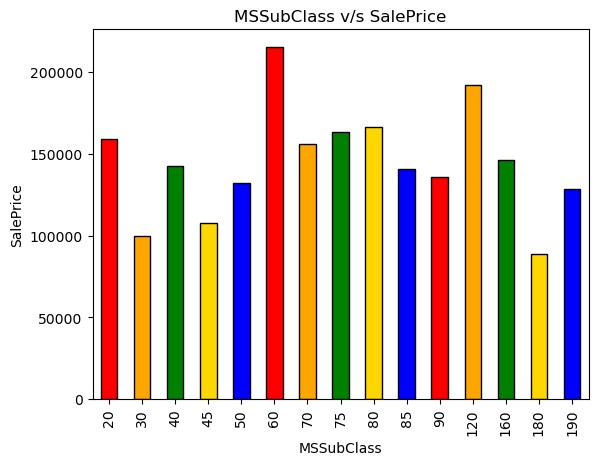

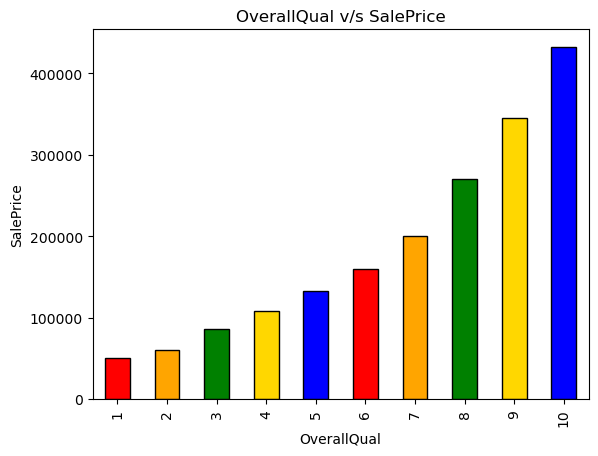

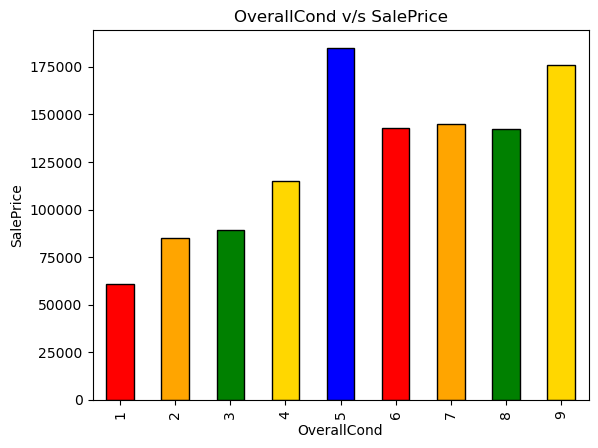

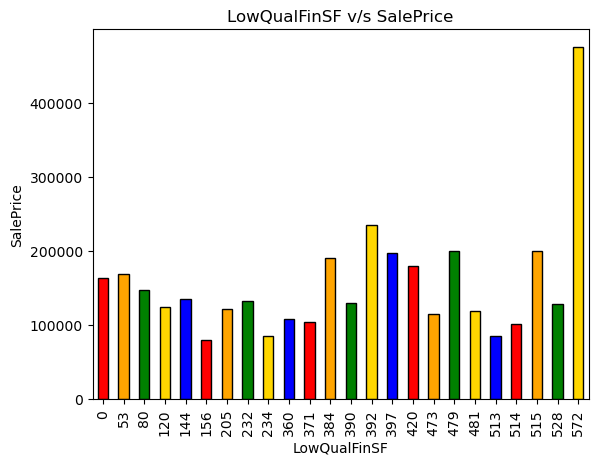

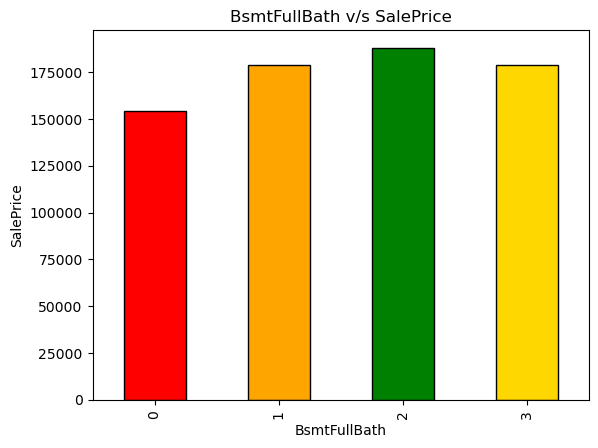

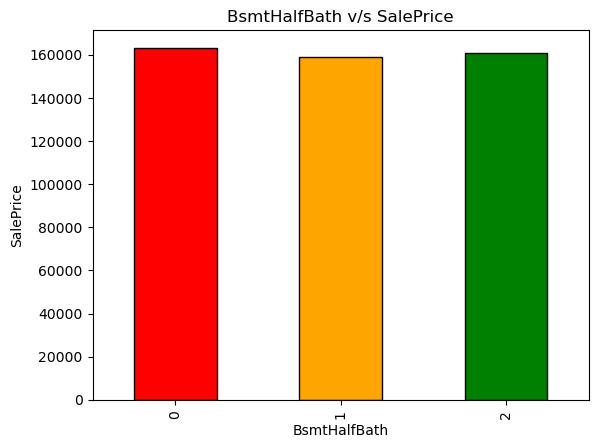

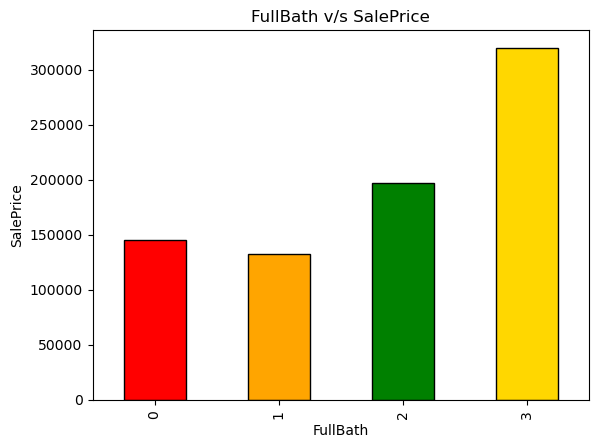

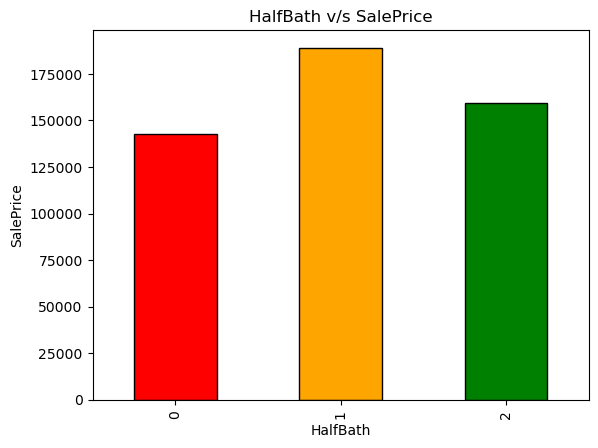

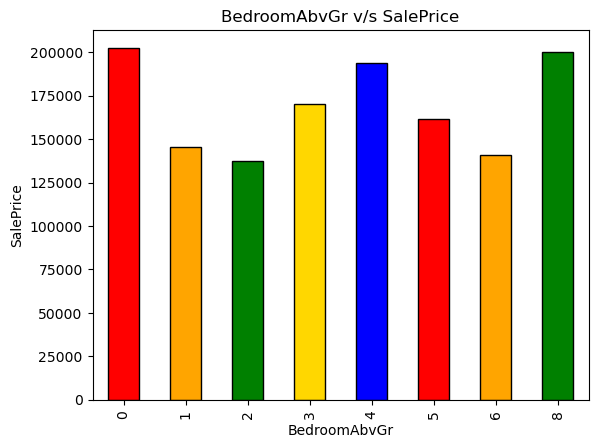

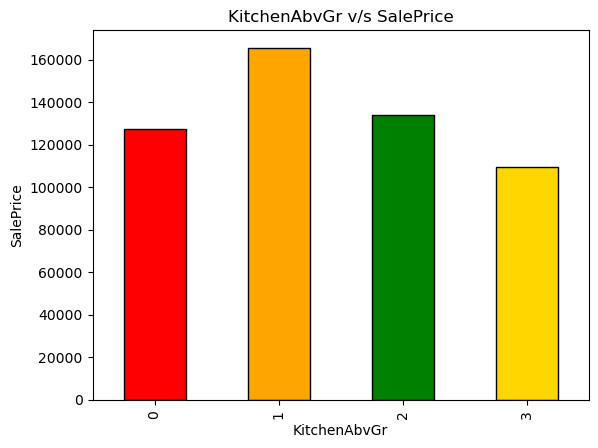

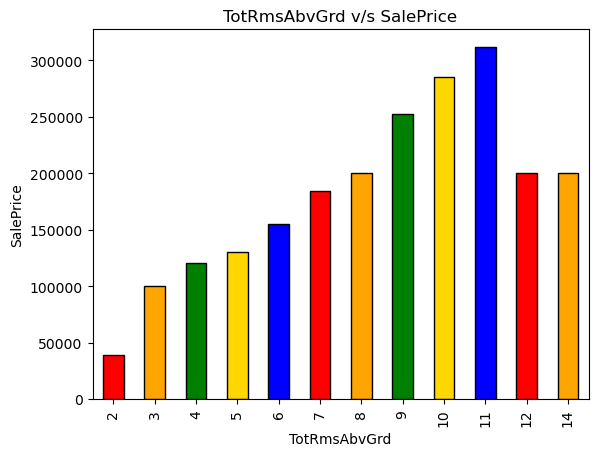

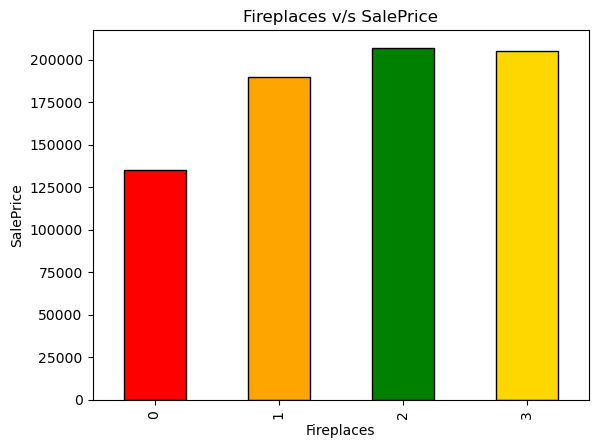

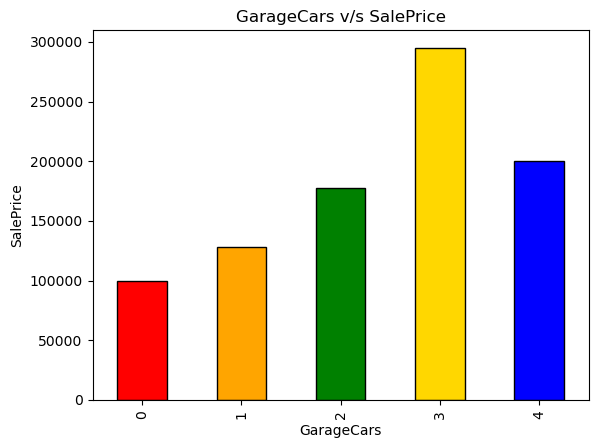

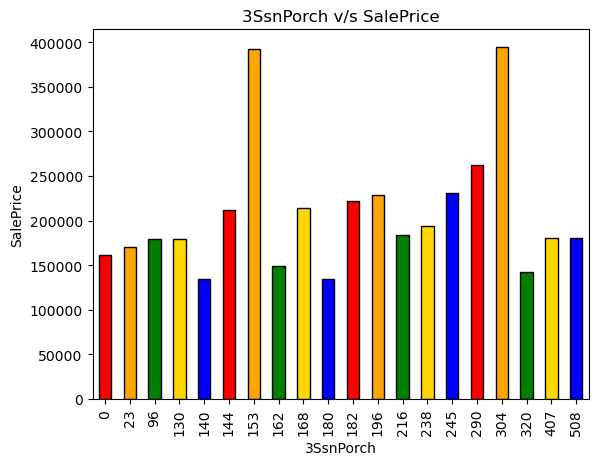

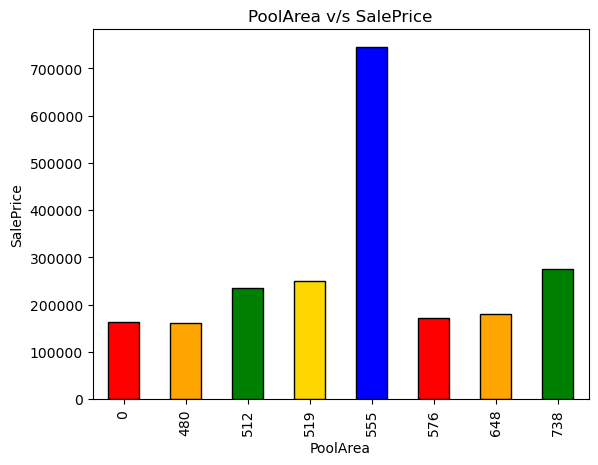

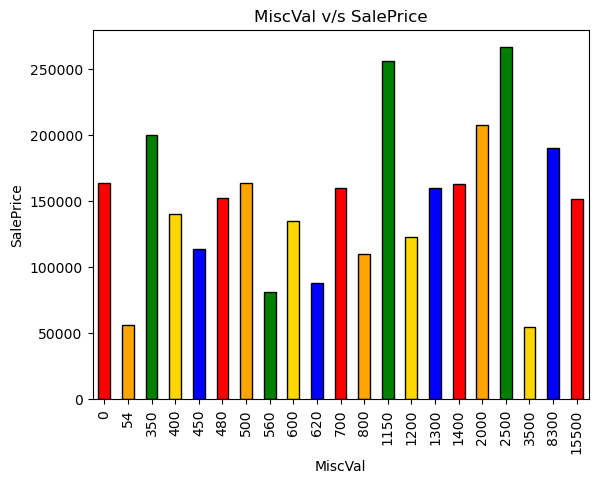

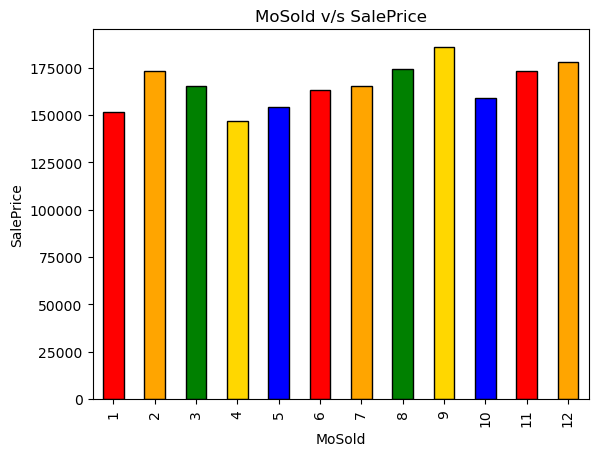

In [20]:
#FOR DISCRETE NUMERICAL FEATURES BEST PLOT IS BAR GRAPHS TO UNDERSTAND THE IMPORTANCE OF THESE FEATURES ON THE MEDIAN SALE PRICE OF THE HOUSE

for feature in discrete_columns:
    df_duplicate=df.copy()
    df_duplicate.groupby(feature)["SalePrice"].median().plot.bar(color=["red","orange","green","gold","blue"],edgecolor="black")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature +" v/s SalePrice")
    plt.show()

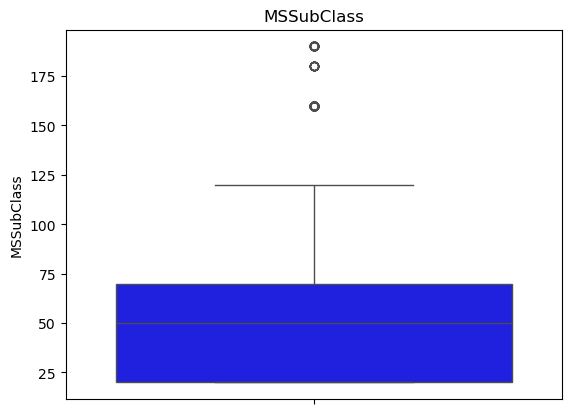

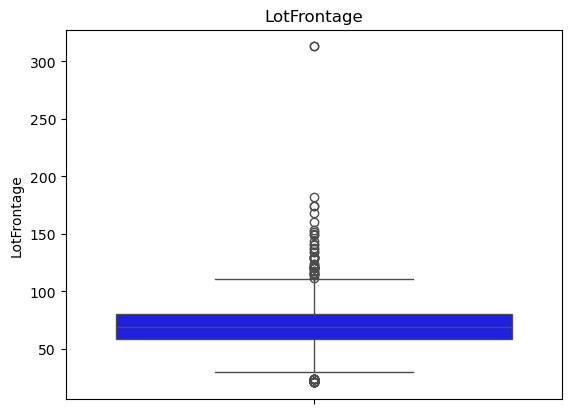

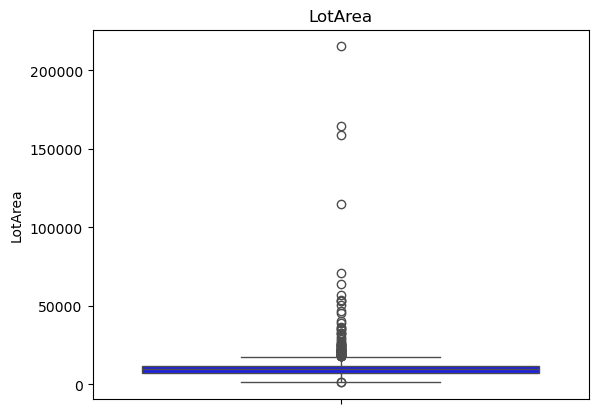

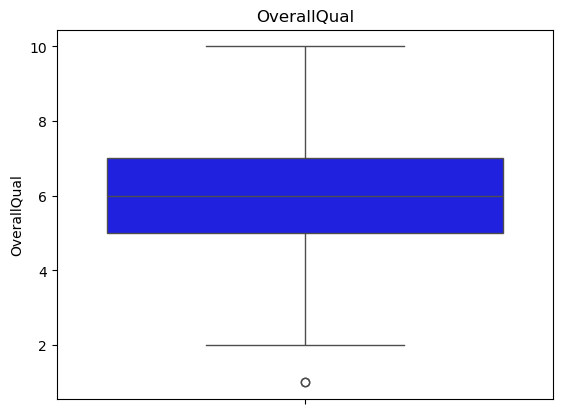

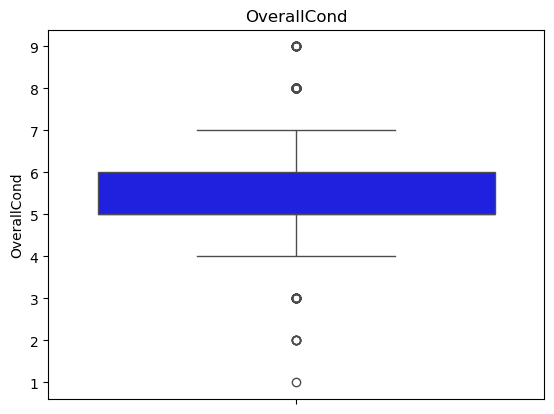

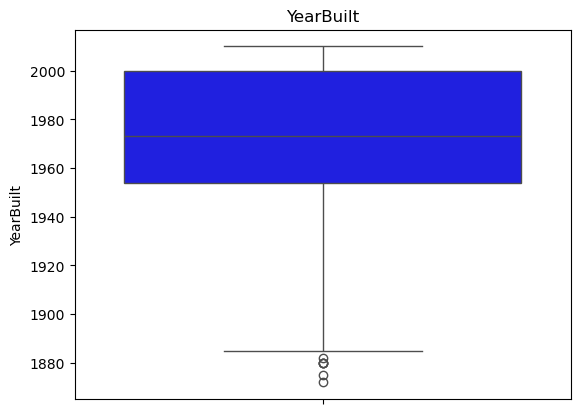

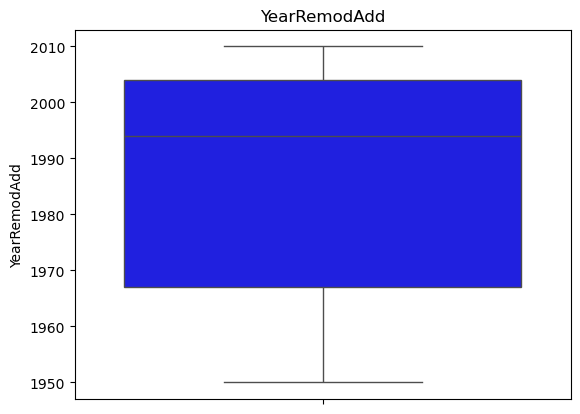

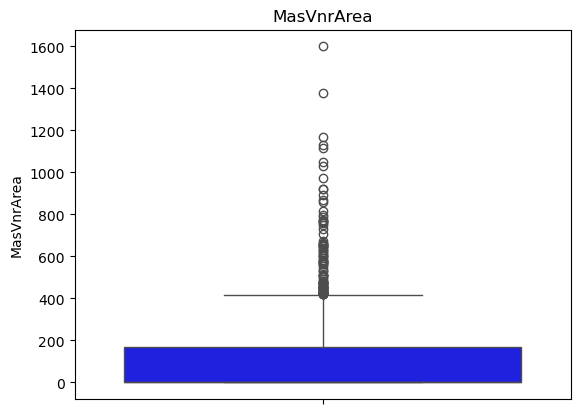

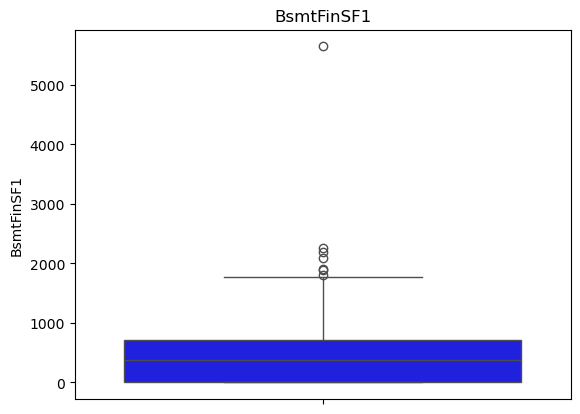

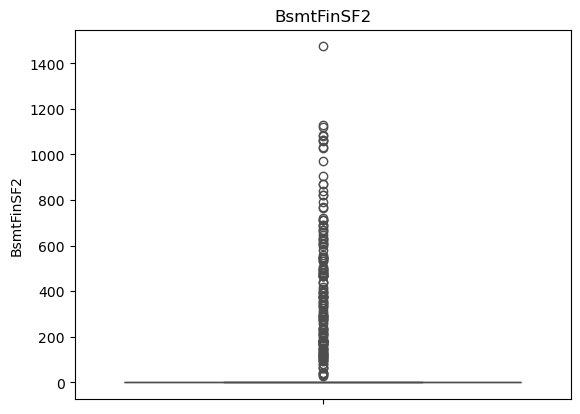

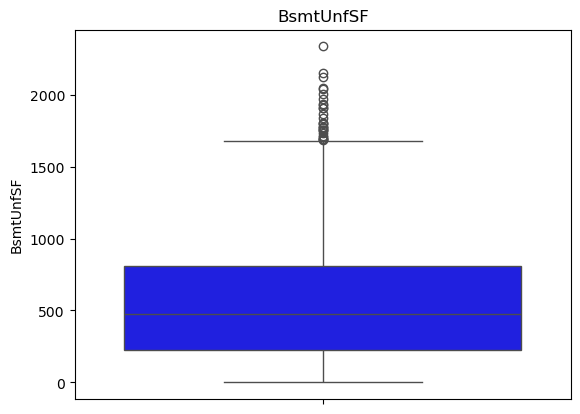

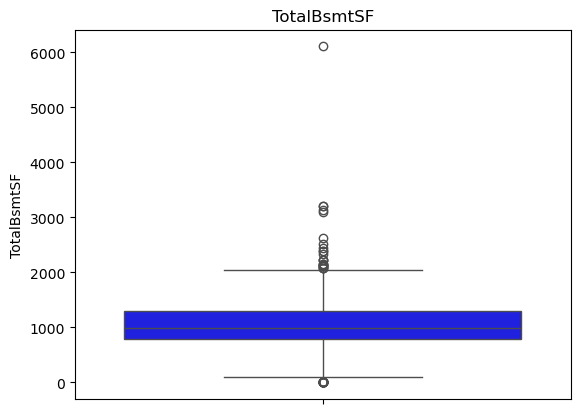

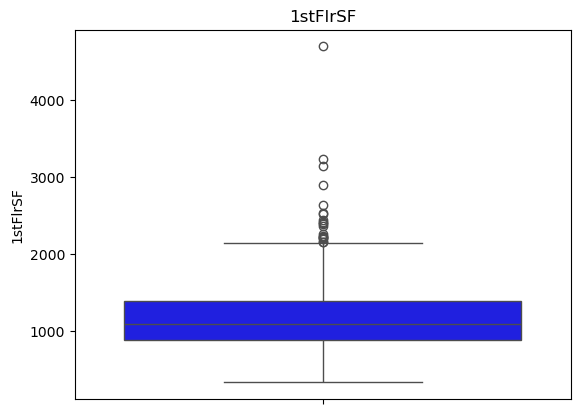

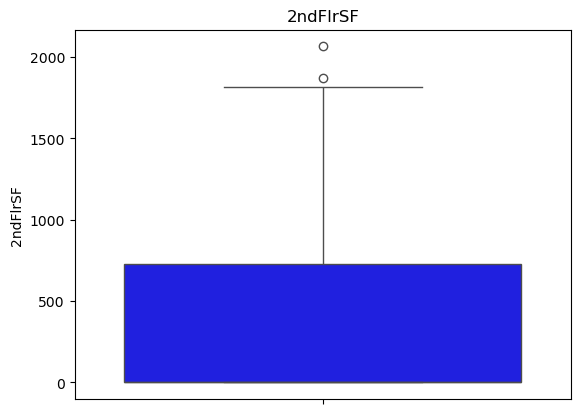

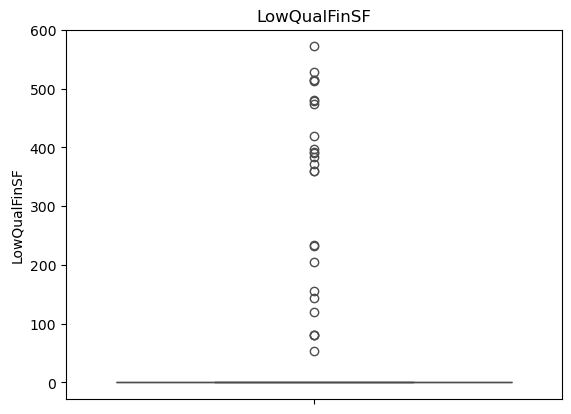

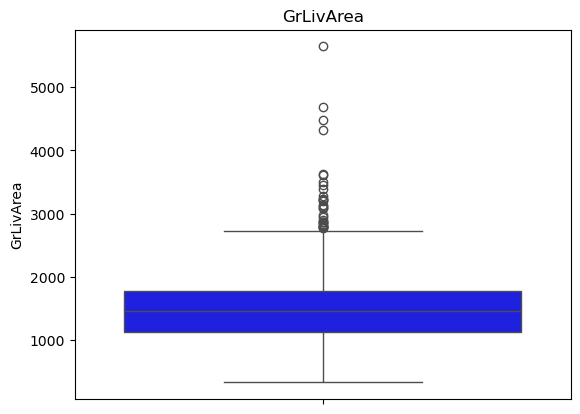

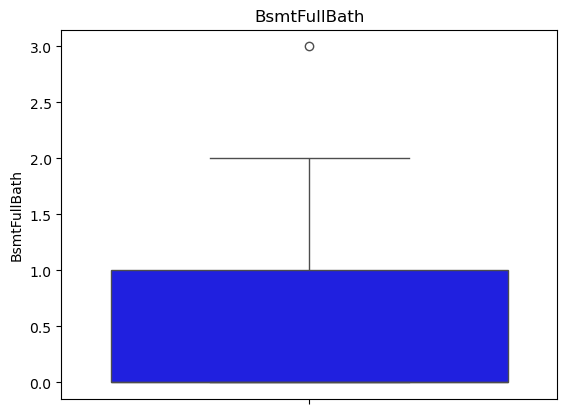

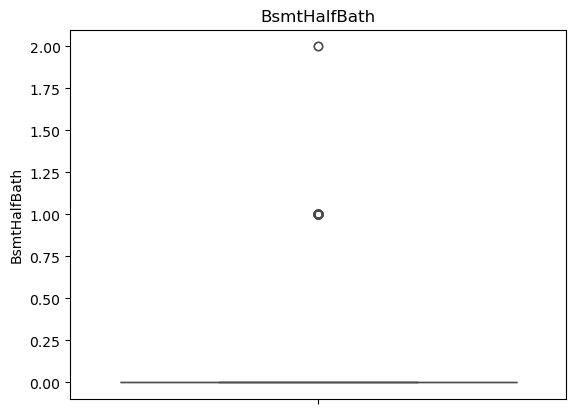

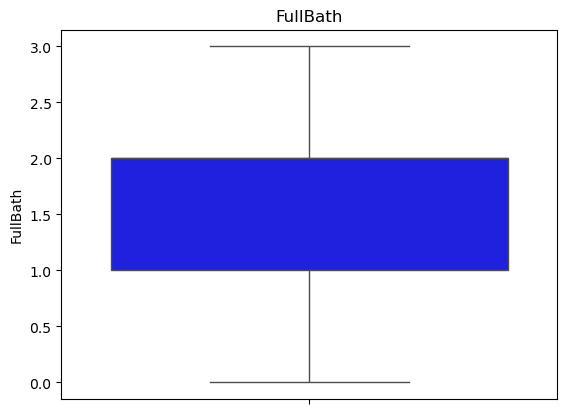

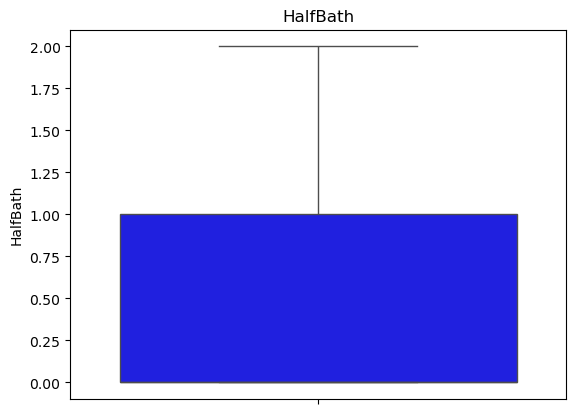

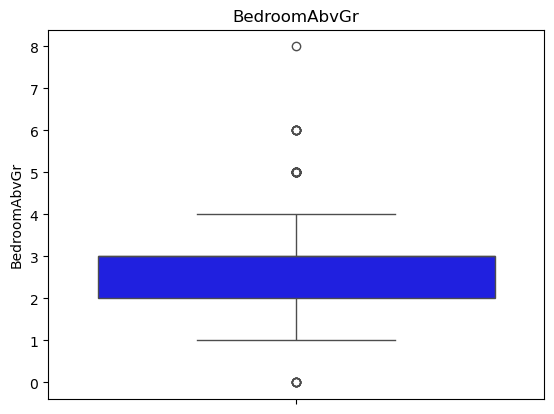

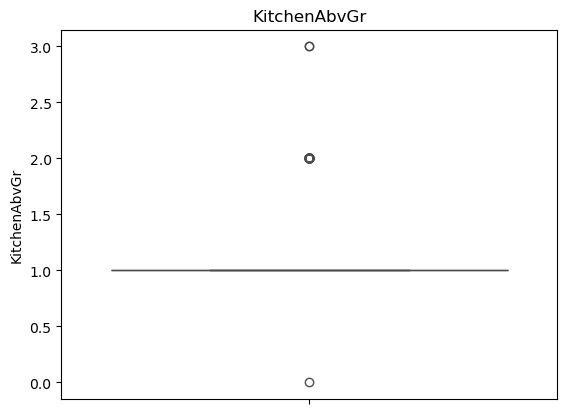

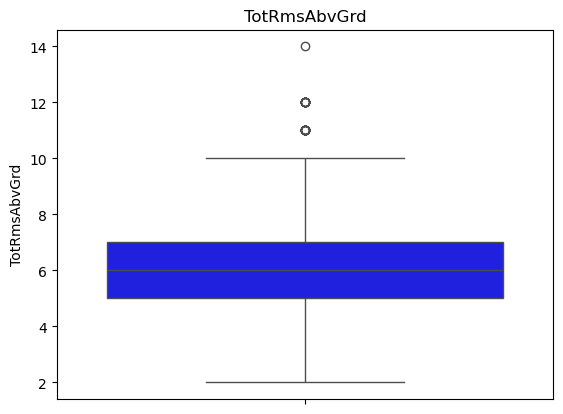

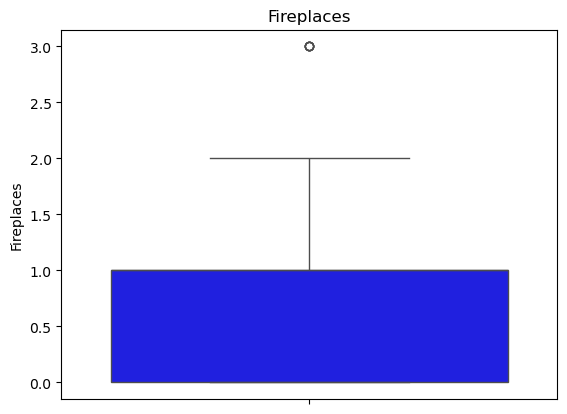

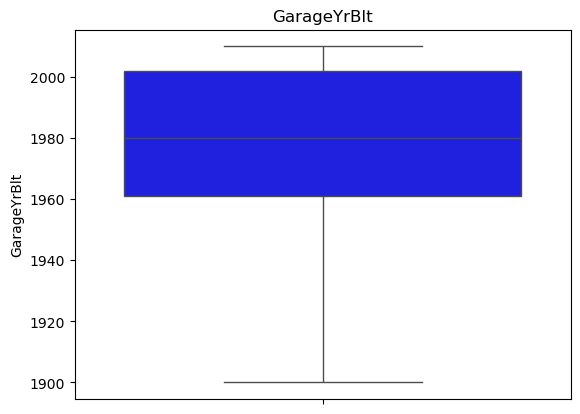

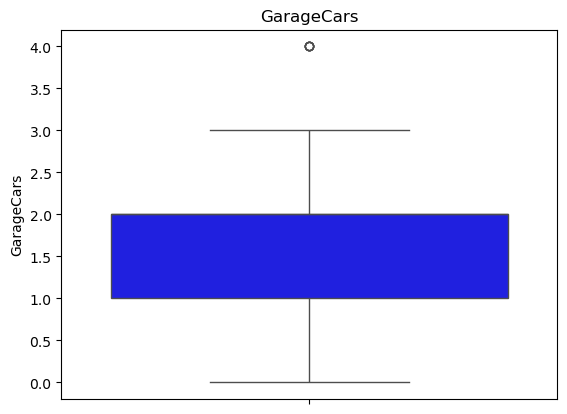

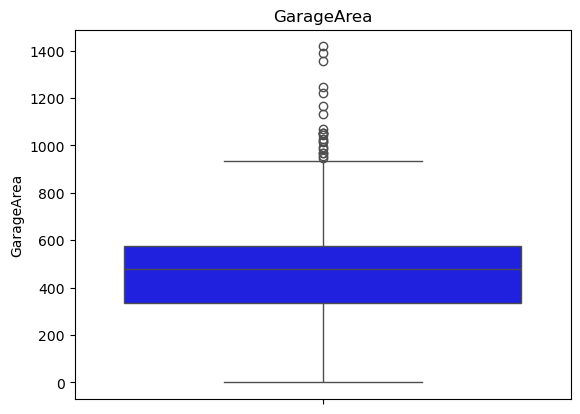

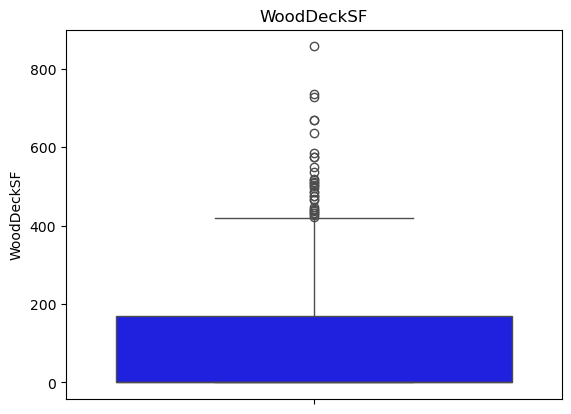

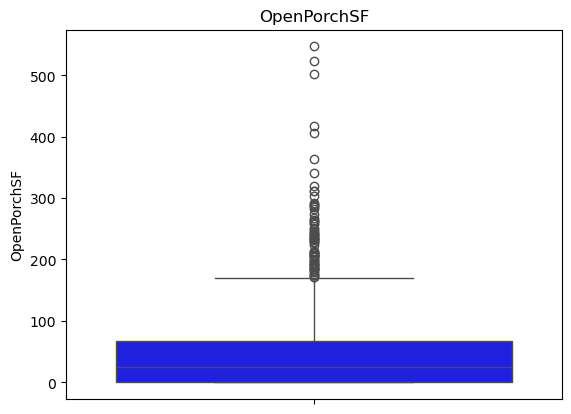

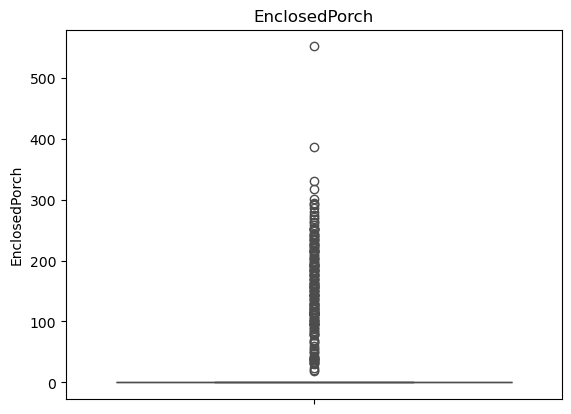

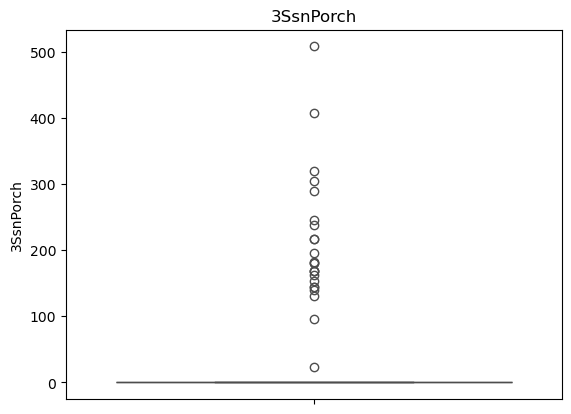

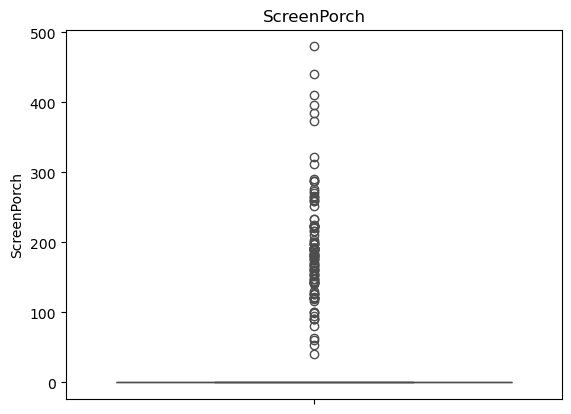

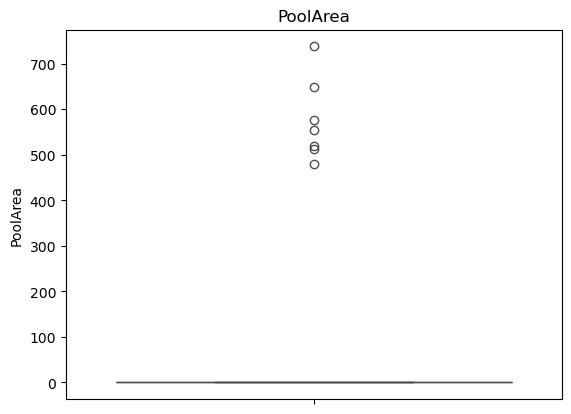

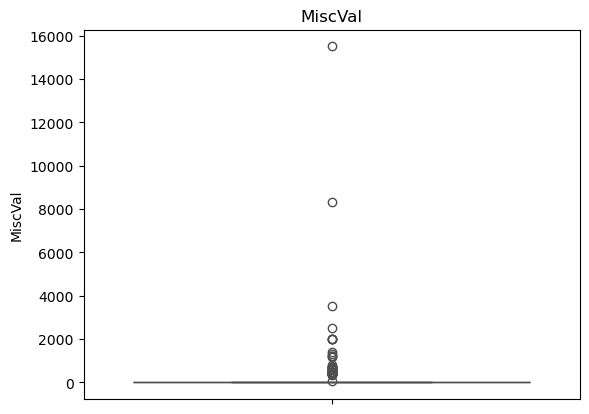

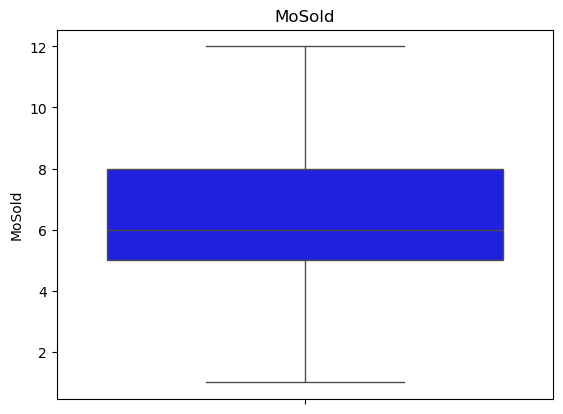

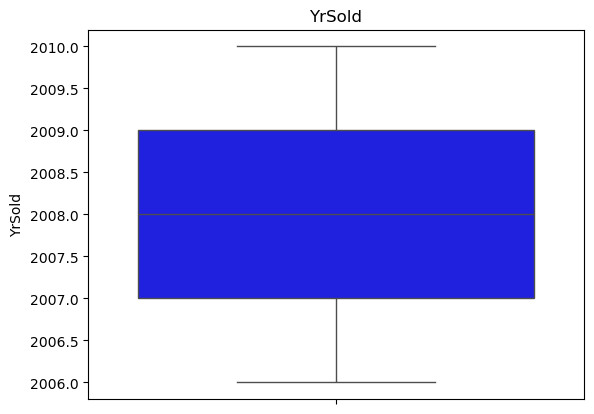

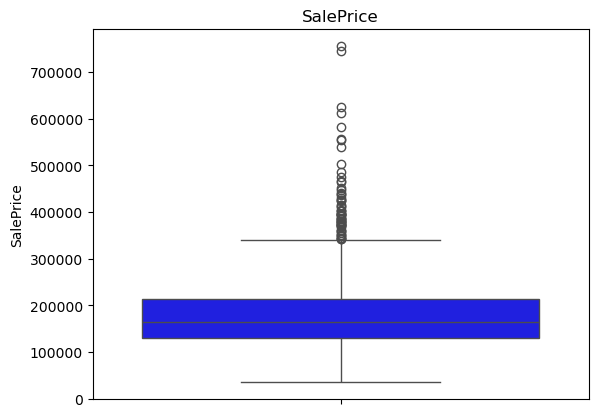

In [21]:
#SINCE THE NUMERICAL_COLUMNS HAVE NaN VALUES LET US PLOT BOX_PLOT TO FIND THE OUTLIERS IN NUMERICAL_COLUMNS
for feature in numerical_columns:
    sns.boxplot(df[feature],color="blue")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()



#["LotFrontage"---many outliers]
#["MasVnrArea"----many outliers]
#["BsmtFinSF1"---few outliers]
#["BsmtFinSF2"---almost entire column is filled with outliers]
#["BsmtUnfSF"---few outliers]
#["TotalBsmtSF"---few outliers]
#["BsmtFullBath"---1 outlier]
#["BsmtHalfBath"----2 outliers]
#["GarageYrBlt"------1 outlier]
#["GarageCars"------2 outliers]
#["GarageArea"-----quite a few outliers]



#SINCE WE HAVE OUTLIERS IN THE COLUMNS WITH NaN VALUES,MEDIAN IMPUTATION IS THE BEST TECHNIQUE TO FILL THE NaN VALUES

In [22]:
#DUE TO THE PRESENCE OF TOO MANY OUTLIERS WE HAVE DECIDED TO FILL IN THE NaN VALUES WITH THE MEDIAN OF THE RESPECTIVE NUMERICAL FEATURE
#REASON---median keeps in check the outliers and the final median value is less afftected by the presence of outliers as it points to middle value
#but in case of mean outliers are very painful as they can significantly sway the value in favour or against

for feature in numerical_columns_with_na:
    df[feature]=df[feature].fillna(df[feature].median())

In [23]:
df[numerical_columns_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [25]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

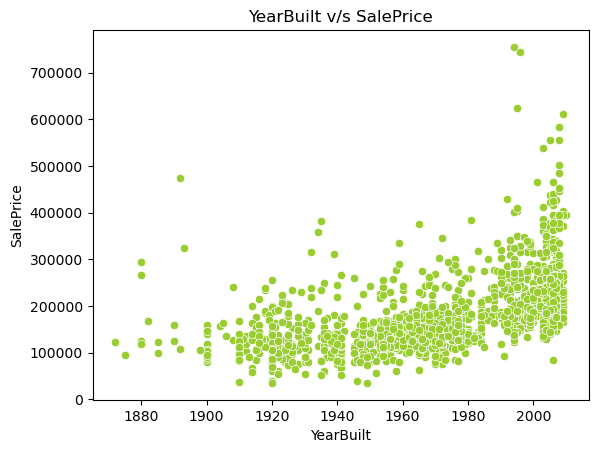

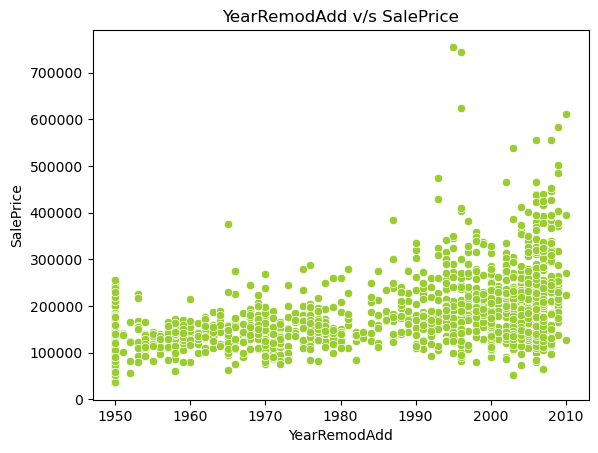

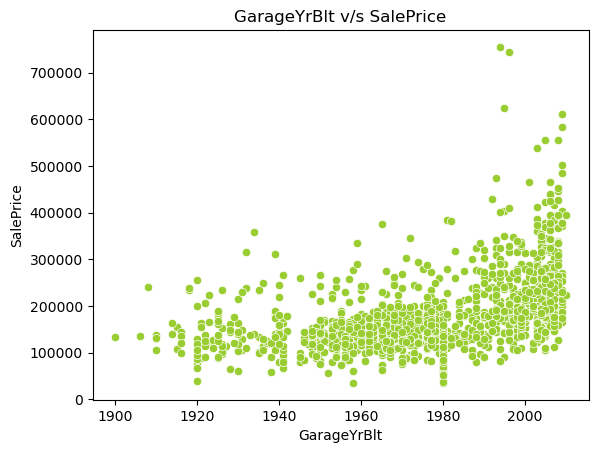

In [26]:
#USING SCATTERPLOT TO DEPICT THE YEAR_FEATURES AND SEE THE CORELATION OF THE YEAR FEATURES WITH THE MEDIAN PRICE

for feature in year_columns:
    if feature=="YrSold":
        pass
    else:
        sns.scatterplot(x=df[feature],y=df["SalePrice"],color="yellowgreen")
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature +" v/s SalePrice")
        plt.show()

Text(0.5, 1.0, 'LinePlot')

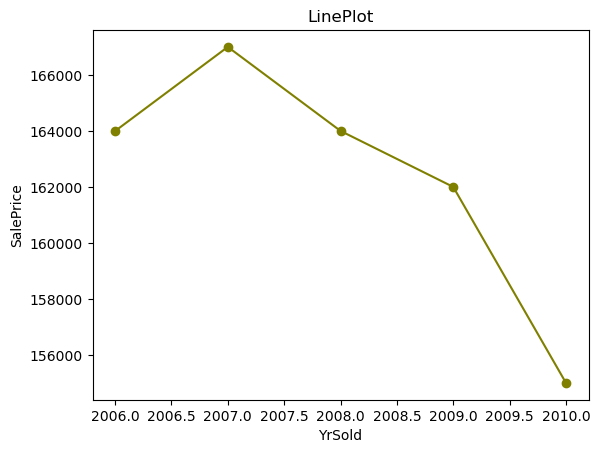

In [27]:
#LINE PLOT BETWEEN THE "YrSold" column and "SalePrice"

df.groupby("YrSold")["SalePrice"].median().plot(kind="line",color="olive",marker="o")
plt.xlabel("YrSold")
plt.ylabel("SalePrice")
plt.title("LinePlot")


#WE CAN SEE THAT THE SALE_PROCE DECREASES WITH THE INCREASE IN THE YEAR HOUSE IS SOLD

In [28]:
year_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [29]:
#CALCULATING THE EFFECTIVE AGES SUCH AS HOUSE AGE,GARAGE AGE,YEAR_SINCE_HOUSE_MODIFIED
#THESE FEATURES ADD A LOT MORE MEANING TO OUR MODEL RATHER THAN THE ABSOLUTE YEAR VALUES 

df["HouseAge"]=df["YrSold"]-df["YearBuilt"]
df["GarageAge"]=df["YrSold"]-df["GarageYrBlt"]
df["YearSinceRemod"]=df["YrSold"]-df["YearRemodAdd"]
df["IsHouseRemod"]=(df["YearRemodAdd"]>df["YearBuilt"]).astype(int)

In [30]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [31]:
df[["YearBuilt","YearRemodAdd","YrSold"]].head(50)

YearBuilt  YearRemodAdd  YrSold
0        2003          2003    2008
1        1976          1976    2007
2        2001          2002    2008
3        1915          1970    2006
4        2000          2000    2008
5        1993          1995    2009
6        2004          2005    2007
7        1973          1973    2009
8        1931          1950    2008
9        1939          1950    2008
10       1965          1965    2008
11       2005          2006    2006
12       1962          1962    2008
13       2006          2007    2007
14       1960          1960    2008
15       1929          2001    2007
16       1970          1970    2010
17       1967          1967    2006
18       2004          2004    2008
19       1958          1965    2009
20       2005          2006    2006
21       1930          1950    2007
22       2002          2002    2008
23       1976          1976    2007
24       1968          2001    2010
25       2007          2007    2009
26       1951          2000    2010
27       2007          2008    2010
28       1957          1997    2006
29       1927          1950    2008
30       1920          1950    2008
31       1966          2006    2008
32       2007          2007    2008
33       1959          1959    2010
34       2005          2005    2007
35       2004          2005    2006
36       1994          1995    2009
37       1954          1990    2009
38       1953          2007    2010
39       1955          1955    2008
40       1965          1965    2006
41       1959          1959    2007
42       1983          1983    2007
43       1975          1980    2008
44       1959          1959    2006
45       2005          2005    2010
46       2003          2003    2009
47       2006          2006    2007
48       1920          2008    2009
49       1966          1966    2007

In [32]:
(df["YearRemodAdd"]>df["YearBuilt"]).astype(int).head(20)

0     0
1     0
2     1
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    0
18    0
19    1
dtype: int64

In [33]:
df["SaleCondition"].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [34]:
df["KitchenQual"].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [35]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [36]:
categorical_columns_with_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [37]:
#CREATING A NEW LABEL---"Missing" FOR OUR CATGEORICAL_COLUMNS 

for feature in categorical_columns_with_na:
    df[feature]=df[feature].fillna("Missing")

In [38]:
df[categorical_columns_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

<Axes: xlabel='KitchenQual'>

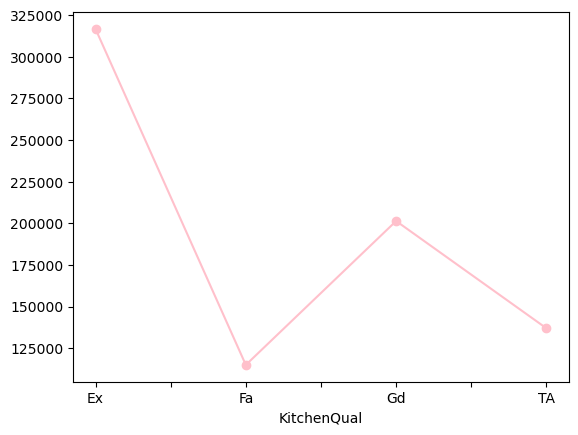

In [39]:
#CREATING LINE PLOTS TO UNDERSTAND THE RELATIONSHIP BETWEEN THE INPUT_FEATURES AND SALEPRICE (MEDIAN)

df.groupby("KitchenQual")["SalePrice"].median().plot(color="pink",marker="o")

In [40]:
discrete_columns=[features for features in numerical_columns if len(df[features].unique())<25 and features not in year_columns]
discrete_columns

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [41]:
continuous_columns=[features for features in numerical_columns if features not in year_columns and features not in discrete_columns]
continuous_columns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

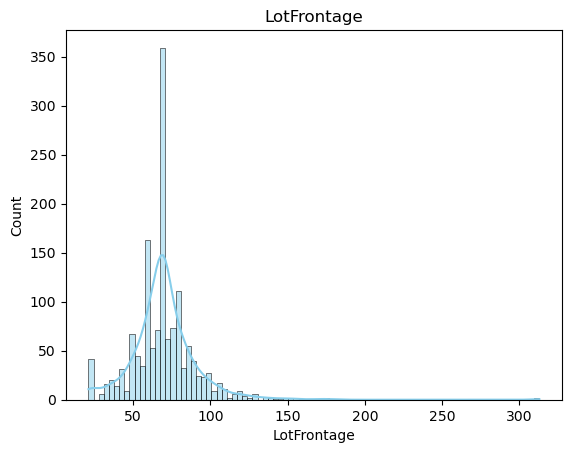

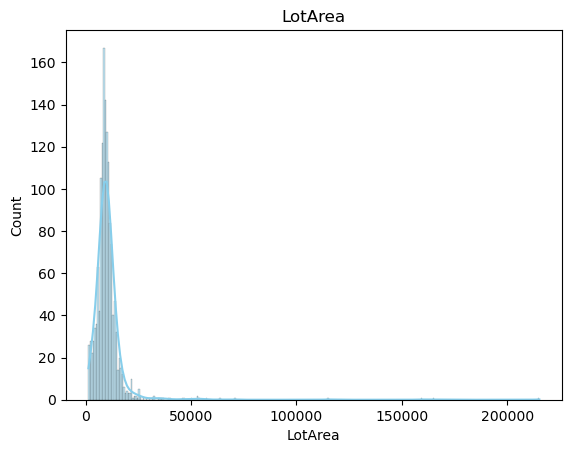

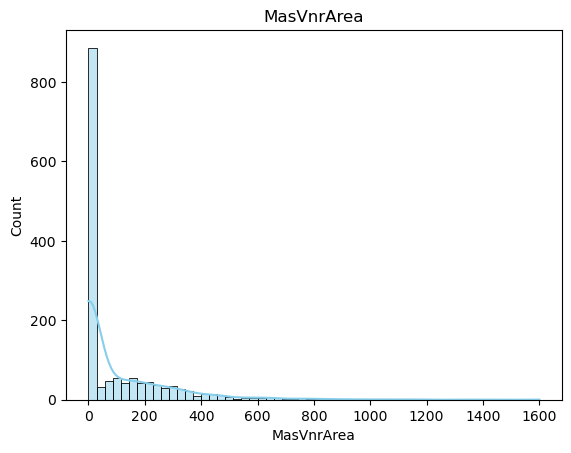

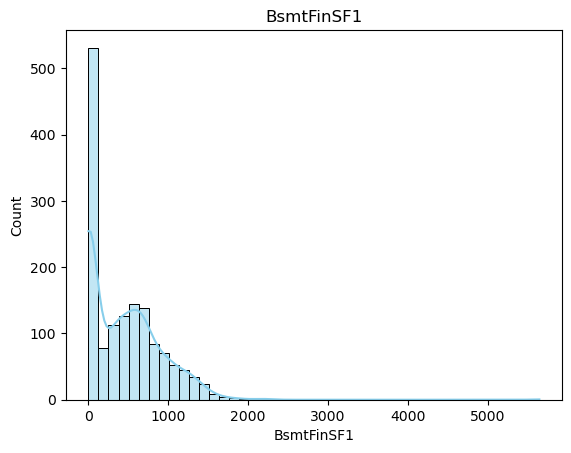

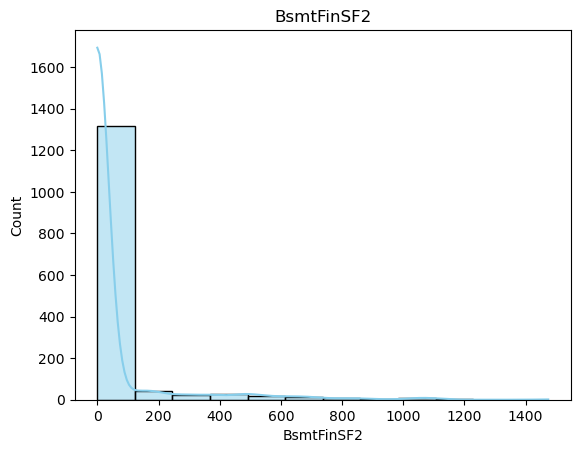

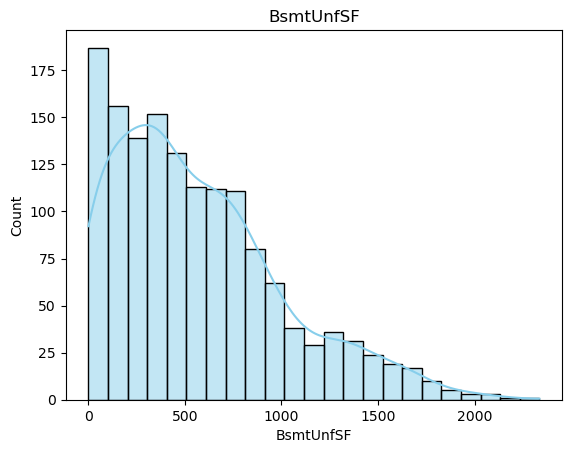

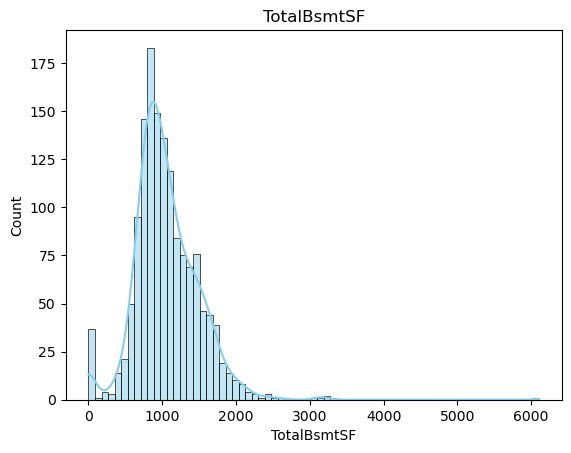

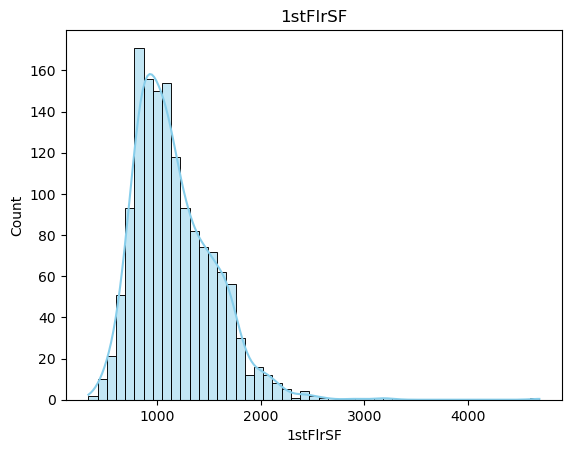

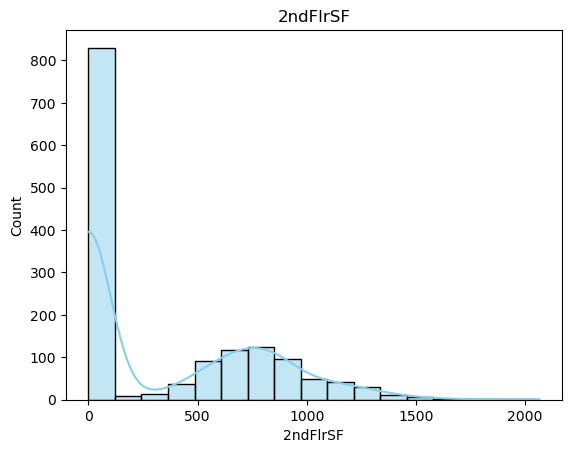

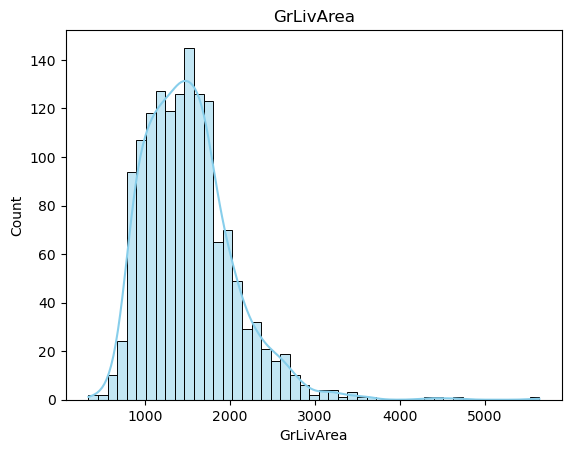

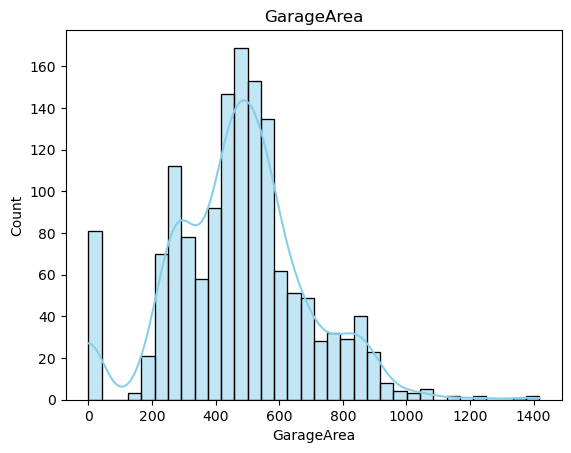

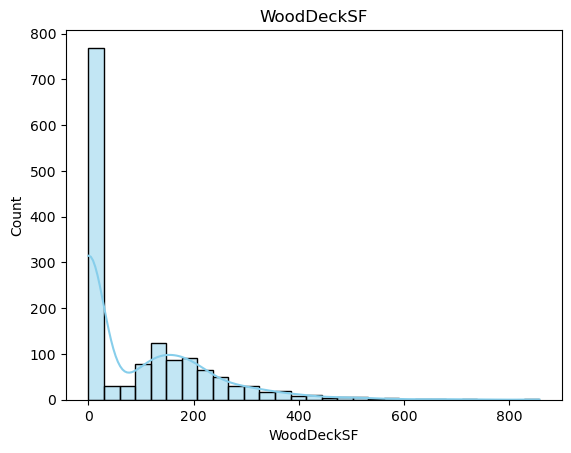

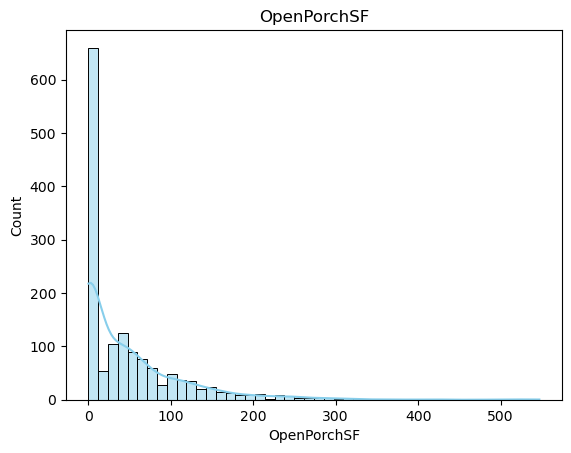

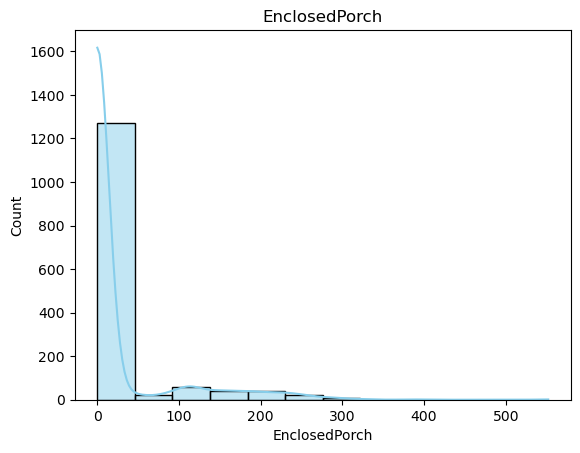

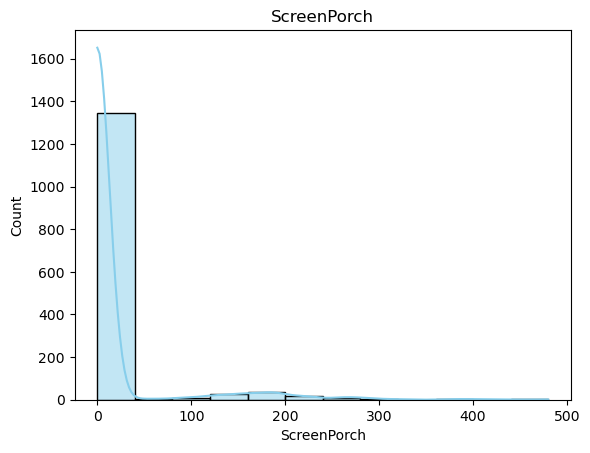

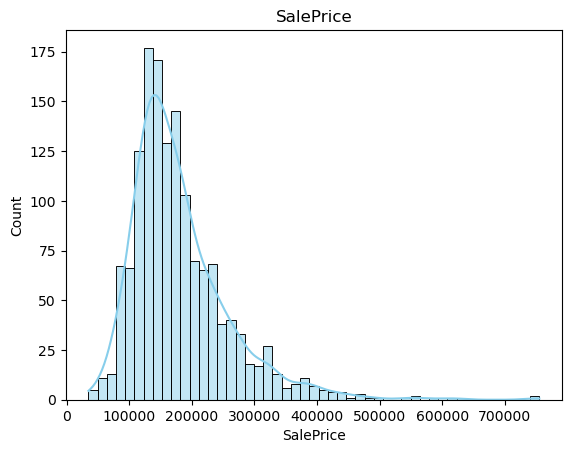

In [42]:
#FOR THE CONTINUOUS_FEATURES THE BEST PLOT IS HISTOGRAM WITH kde=True AS IT TELLS US ABOUT THE DISTRIBUTION OF OUR CONTINUOUS_FEATURES

for feature in continuous_columns:
    sns.histplot(df[feature],color="skyblue",edgecolor="black",kde=True)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [43]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7    

In [44]:
#WE HAVE HANDLED MISSING VALUES IN CATEGORICAL COLUMNS
#NOW WE CALCULATE THE PERCENTAGE OF CATEGORY WITHIN EACH CATEGORICAL COLUMN
#IF THE PERCENTAGE OF THE CATEGORY IS >=1% THEN WE KEEP IT ELSE WE LABEL IT AS RARE_CATEGORY


for feature in categorical_columns:
    temp=df.groupby(feature)["SalePrice"].count()/len(df)
    temp_index=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_index),df[feature],"Rare_Feature")

In [45]:
df["MoSold"].value_counts()

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

In [46]:
#WE CAN SEE THAT ['MAY','JUNE','JULY'] ARE THE HIGHEST DEMANDING MONTHS FOR REAL ESTATE
#WE CAN CREATE A FEATURE[NUMERICAL] WHERE THESE HIGH DEMANDING MONTH CAN BE GROUPED TOGETHER AND LESS DEMANDING TOGETHER

#2--VERY HIGH DEMAND[5,6,7]
#1--MODERATE DEMAND[3,4,8,10]
#LESS DEMAND[1,2,9,11,12]


df["HighDemandMonth"]=df["MoSold"].map({5:2,6:2,7:2,3:1,4:1,8:1,10:1,1:0,2:0,9:0,11:0,12:0})

In [47]:
df.groupby("MoSold")["SalePrice"].median().sort_values(ascending=False)

MoSold
9     185900.0
12    178000.0
8     174450.0
2     173250.0
11    173000.0
3     165250.0
7     165195.0
6     163000.0
10    159000.0
5     154000.0
1     151650.0
4     147000.0
Name: SalePrice, dtype: float64

<Axes: xlabel='MoSold'>

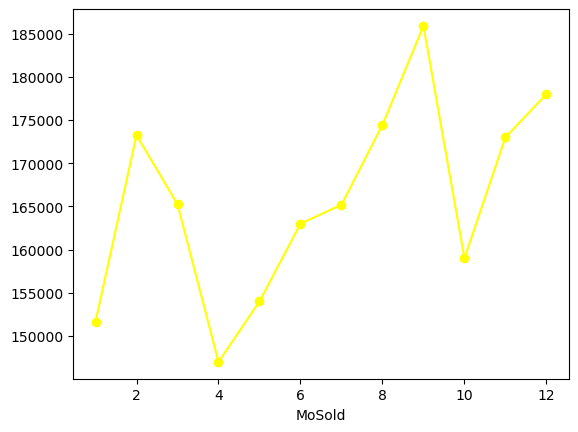

In [48]:
df.groupby("MoSold")["SalePrice"].median().plot(color="yellow",marker="o")

In [49]:
df["MonthSin"]=np.sin(2*np.pi*df["MoSold"]/12)
df["MonthCos"]=np.cos(2*np.pi*df["MoSold"]/12)

In [50]:
#Based on the HighDemandMonth feature we have calculated the median prices and created a feature HighDemandMonthPrice
#Mapping the median price on teh basis of numerical_category in HighDemandMonth

median_price=df.groupby("HighDemandMonth")["SalePrice"].median()
df["HighDemandMonthPrice"]=df["HighDemandMonth"].map(median_price)

In [51]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope  Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl       CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl  Rare_Feature      Feedr   
2         Lvl    AllPub    Inside       Gtl       CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl       Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl       NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [52]:
df["SaleType"].value_counts()

# THESE FEATURES HAVE A POSITIVE CORRELATION WITH RESPECT TO SALEPRICE
# "New"---These command premium price beacuse of zero-wear-tear i.e.,they are newly constructed real estate projects
# "WD"---Warranty Deed these houses are sold close to the normal market prices and show very low variance
# "COD"--Court Officer Deed they are sold at a discounted price because of the legal matters involved in the property w.r.t to the market price
# "Rare_Feature"---Higher than COD but slightly less than WD

SaleType
WD              1267
New              122
COD               43
Rare_Feature      28
Name: count, dtype: int64

In [53]:
median_price_SaleType=df.groupby("SaleType")["SalePrice"].median().sort_values(ascending=False)
median_price_SaleType

SaleType
New             247453.0
WD              158000.0
Rare_Feature    144250.0
COD             139000.0
Name: SalePrice, dtype: float64

In [54]:
df["SaleTypeSalePrice"]=df["SaleType"].map(median_price_SaleType)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope  Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl       CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl  Rare_Feature      Feedr   
2         Lvl    AllPub    Inside       Gtl       CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl       Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl       NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [55]:
df['SaleCondition'].value_counts()

SaleCondition
Normal          1198
Partial          125
Abnorml          101
Family            20
Rare_Feature      16
Name: count, dtype: int64

In [56]:
df.groupby("SaleCondition")["SalePrice"].median()


#THUS WE OUGHT TO PERFORM ORDINAL ENCODING ON "SaleCondition" feature because of positive correlation with SalePrice

SaleCondition
Abnorml         130000.0
Family          140500.0
Normal          160000.0
Partial         244600.0
Rare_Feature    126750.0
Name: SalePrice, dtype: float64

In [57]:
df["KitchenQual"].value_counts()

#ORDINAL ENCODING IS REQUIRED

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

<Axes: xlabel='KitchenQual'>

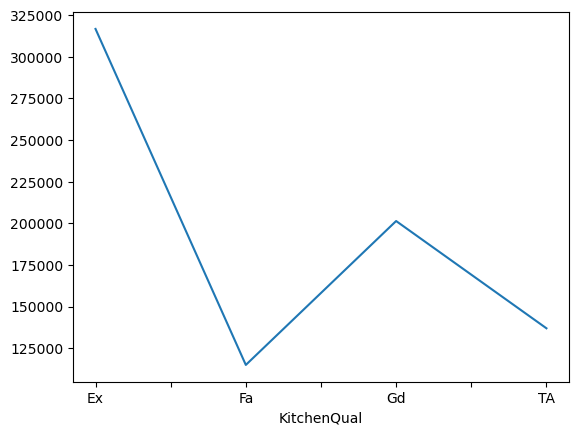

In [58]:
df.groupby("KitchenQual")["SalePrice"].median().plot()

<Axes: xlabel='Foundation'>

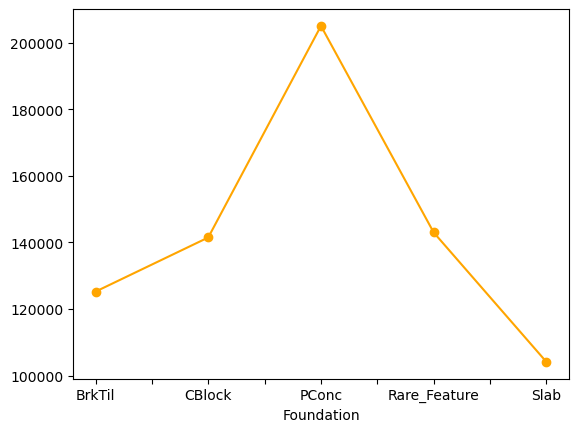

In [59]:
df.groupby("Foundation")["SalePrice"].median().plot(color="orange",marker="o")

In [60]:
df["MasVnrType"].value_counts()

MasVnrType
Missing    872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [61]:
df.groupby("MasVnrType")["SalePrice"].median()

#STONE--HIGHEST END FINISH THUS PREMIUM PRICE
#BRKCMM---CHEAP TYPE OF BRICK THUS LEAST SALE PRICE

MasVnrType
BrkCmn     139000.0
BrkFace    181000.0
Missing    143125.0
Stone      246839.0
Name: SalePrice, dtype: float64

In [62]:
df.groupby("ExterCond")["SalePrice"].mean()

ExterCond
Fa              102595.142857
Gd              168897.568493
Rare_Feature    170125.000000
TA              184034.896256
Name: SalePrice, dtype: float64

<Axes: xlabel='ExterCond'>

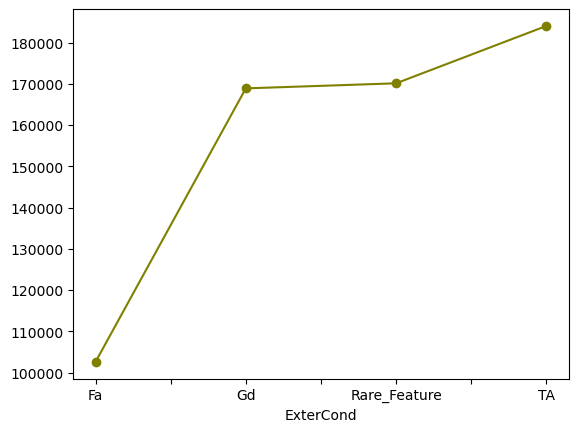

In [63]:
df.groupby("ExterCond")["SalePrice"].mean().plot(color="olive",marker="o")

In [64]:
#ExterCond--CategoricalFeature and we want to convert the categorical feature into numerical feature
#We map the ExterCond based on category and replace the object type with numerical normalizing the data between 0 and 1

mean=df.groupby("ExterCond")["SalePrice"].mean()
mean_max=mean.max()

In [65]:
df.groupby("ExterCond")["SalePrice"].mean()/(mean_max)

ExterCond
Fa              0.557477
Gd              0.917748
Rare_Feature    0.924417
TA              1.000000
Name: SalePrice, dtype: float64

In [66]:
df["ExterCondEncoded"]=df["ExterCond"].map(df.groupby("ExterCond")["SalePrice"].mean()/(mean_max))

In [67]:
df.drop("PoolQC",axis=1,inplace=True)

In [68]:
df["OverallCond"].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [69]:
df.groupby("FireplaceQu")["SalePrice"].median()

FireplaceQu
Ex         314250.0
Fa         158000.0
Gd         206950.0
Missing    135000.0
Po         131500.0
TA         187500.0
Name: SalePrice, dtype: float64

In [70]:
#AFTER CREATING NEW COLUMNS WE HAVE UPDATED OUR NUMERICAL AND CATEGORICAL COLUMNS

numerical_columns=[features for features in df.columns if df[features].dtype!="object"]
categorical_columns=[features for features in df.columns if df[features].dtype=="object"]

In [71]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope  Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl       CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl  Rare_Feature      Feedr   
2         Lvl    AllPub    Inside       Gtl       CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl       Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl       NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

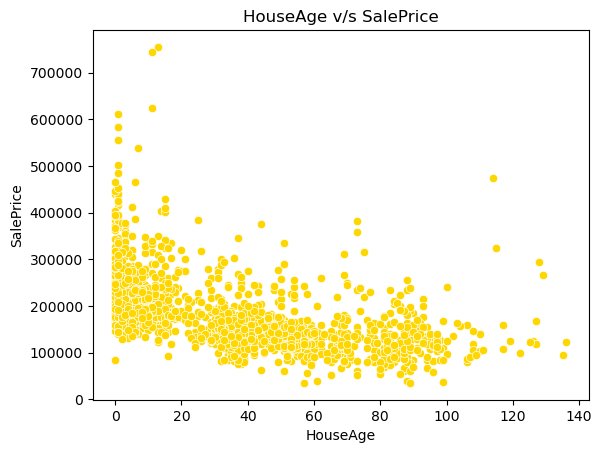

In [72]:
sns.scatterplot(x=df["HouseAge"],y=df["SalePrice"],color="gold")
plt.xlabel("HouseAge")
plt.ylabel("SalePrice")
plt.title("HouseAge v/s SalePrice")
plt.show()

In [73]:
#CREATE PLOTS TO DISTINGUISH ORDINAL AND NON ORDINAL

In [74]:
#ORDINAL ENCODING WILL BE DONE FOR COLUMNS LISTED BELOW

columns_ordinal=[
    "SaleCondition",
    "SaleType",
    "PavedDrive",
    "GarageFinish",
    "GarageType",
    "FireplaceQu",
    "Electrical",
    "HeatingQC",
    "Heating",
    "MSZoning",
    "LandContour",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "MasVnrType",
    "ExterQual",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "ExterCond",
    "BsmtFinType1",
    "BsmtFinType2",
    "KitchenQual"
]


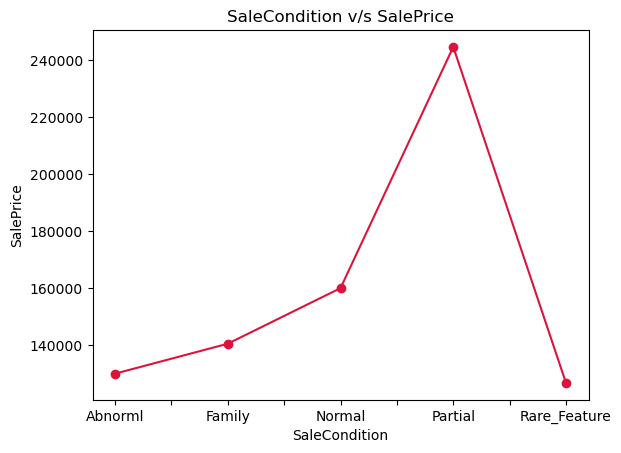

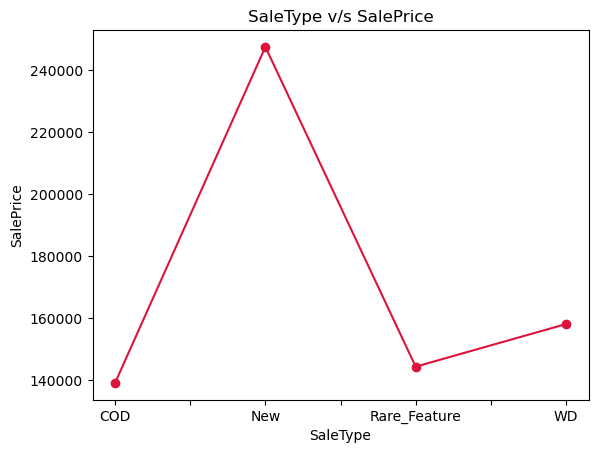

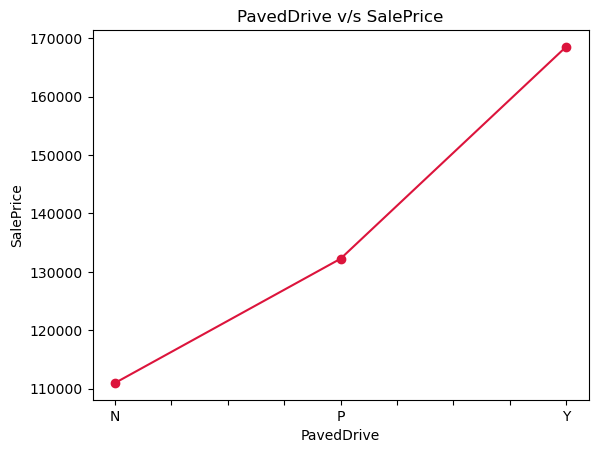

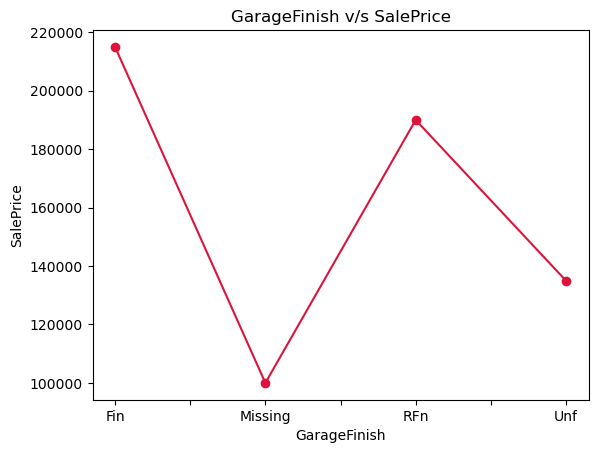

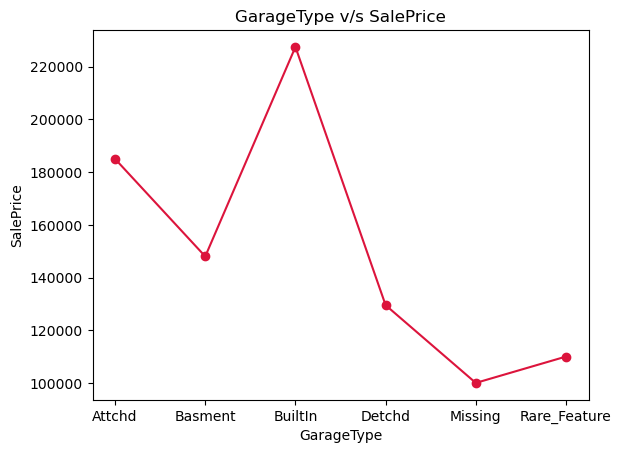

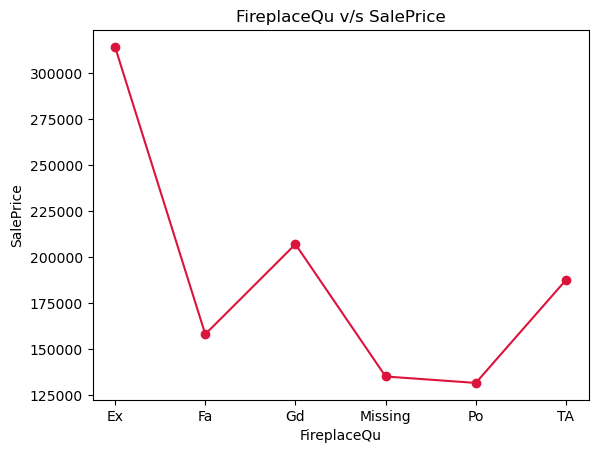

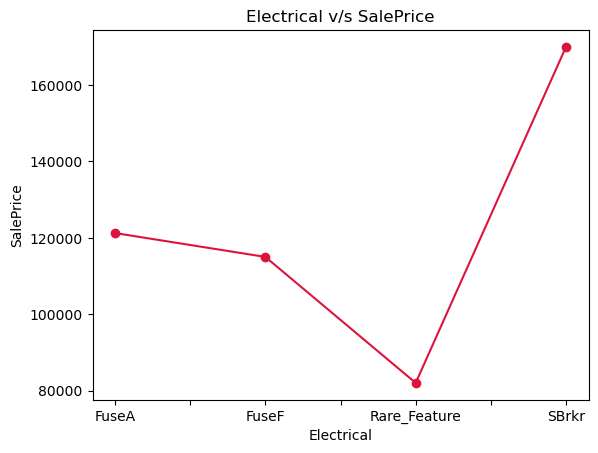

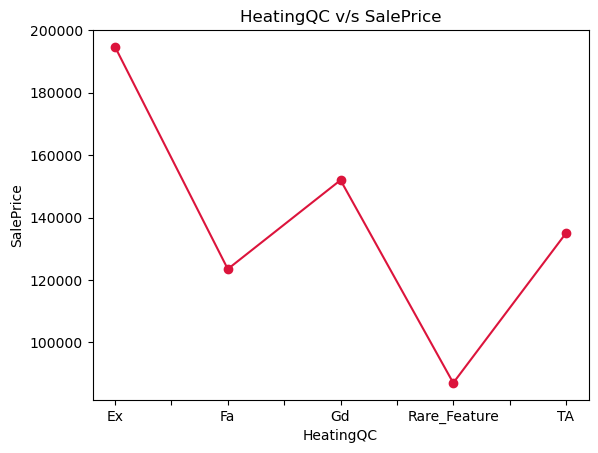

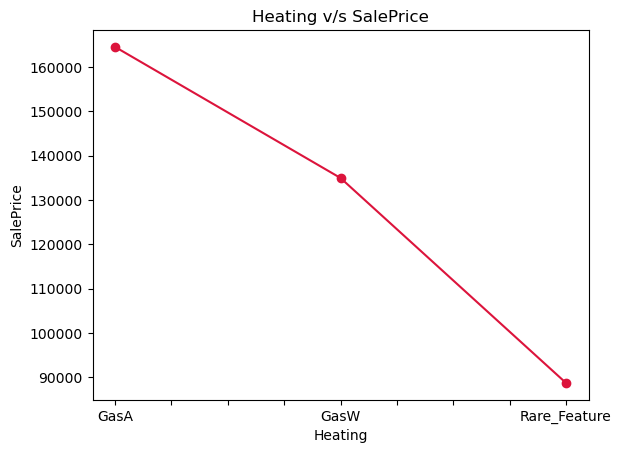

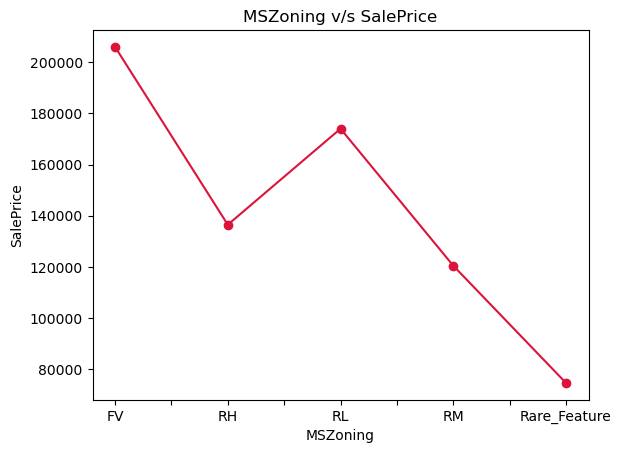

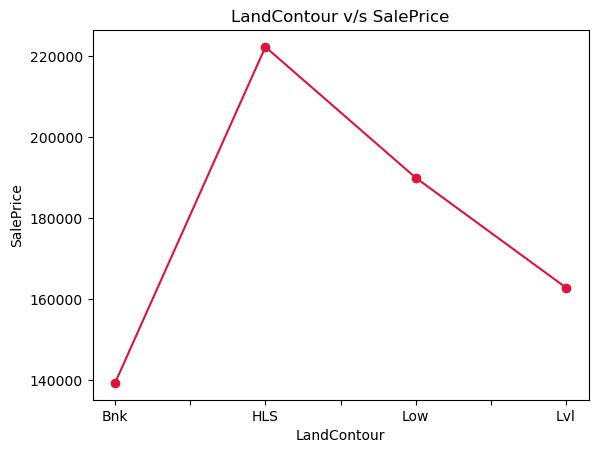

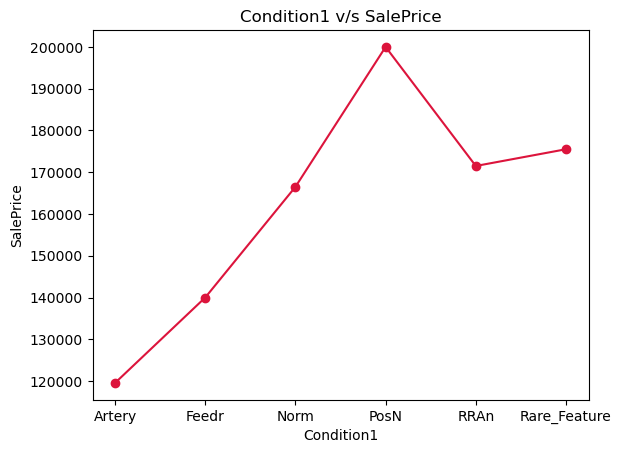

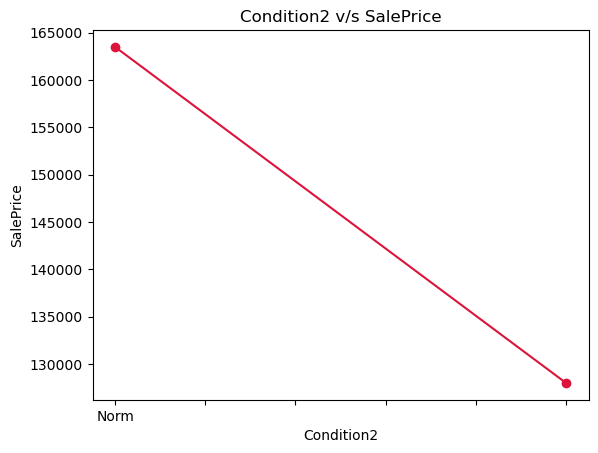

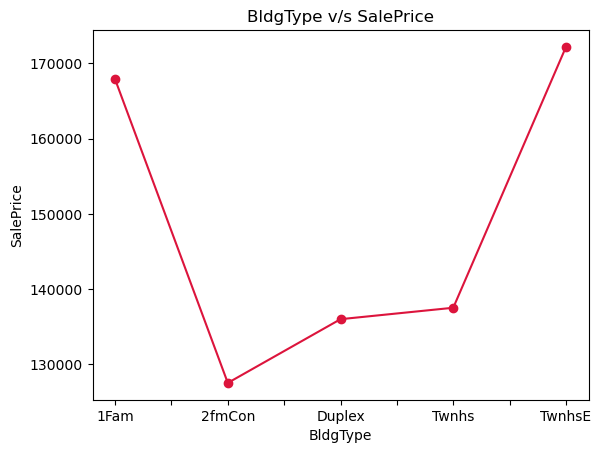

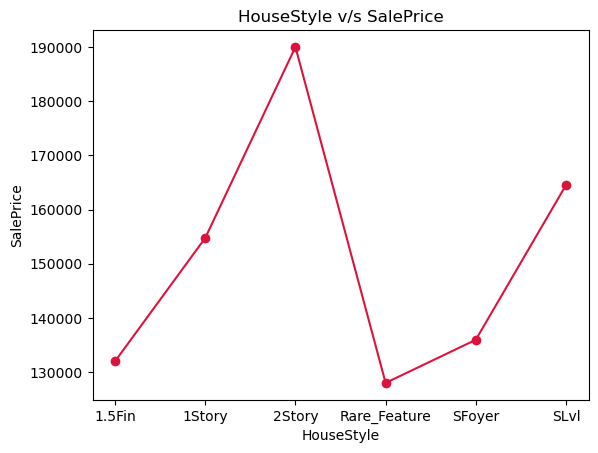

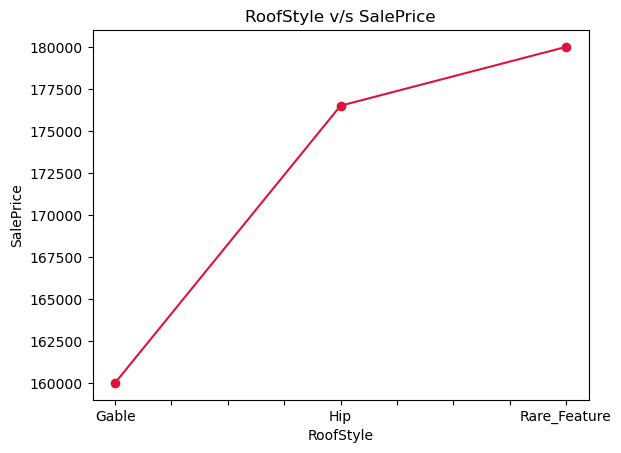

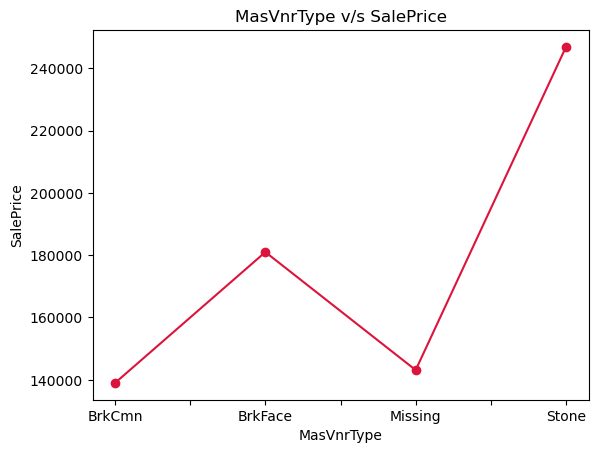

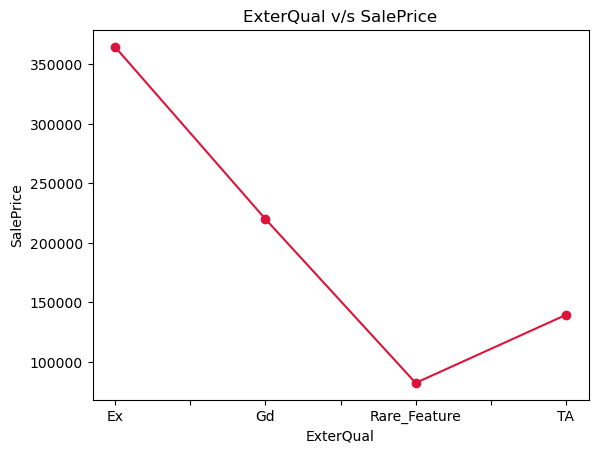

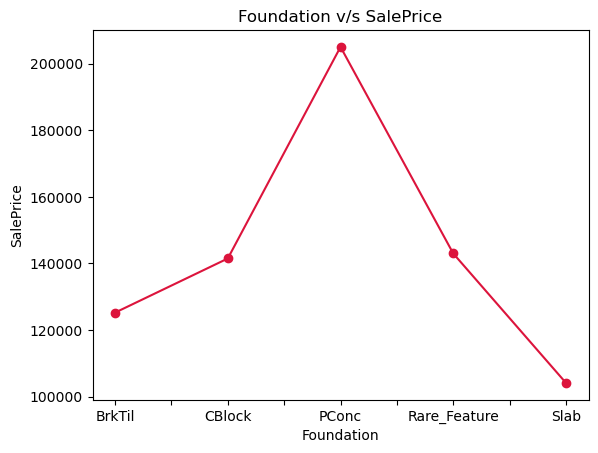

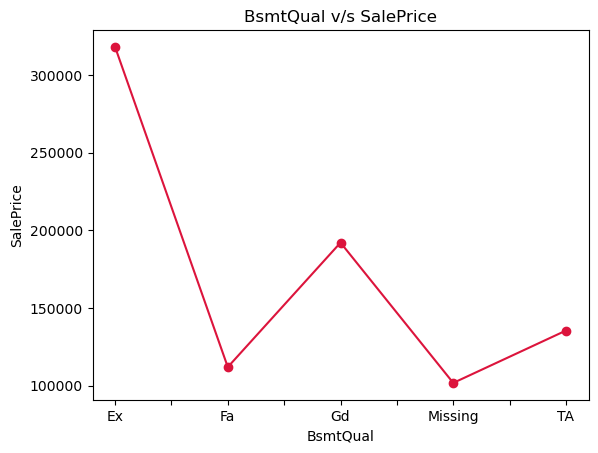

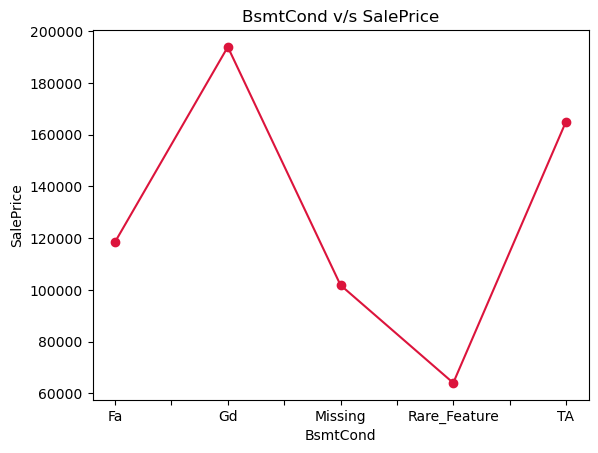

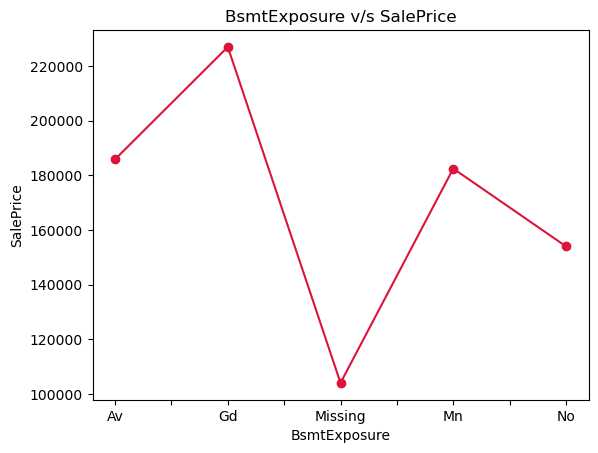

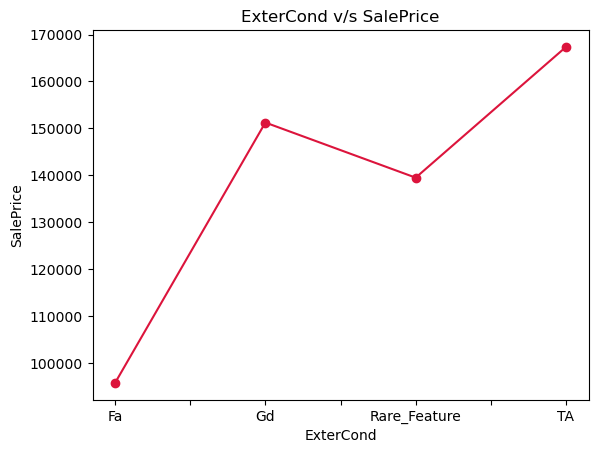

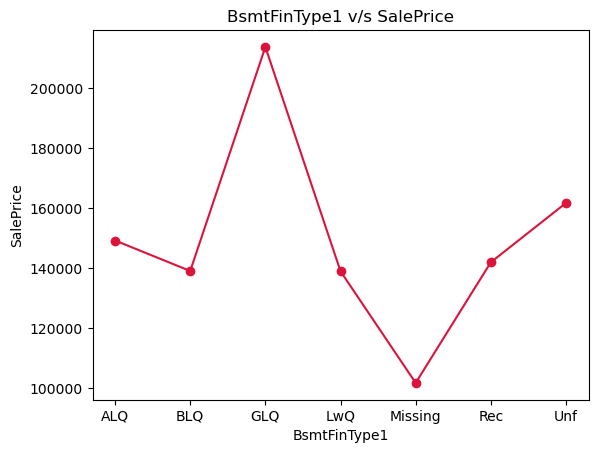

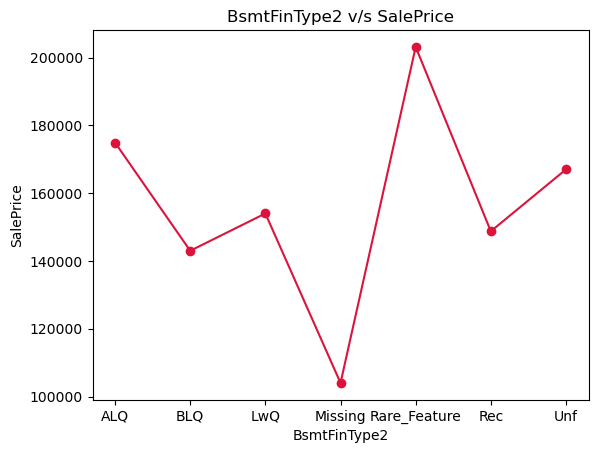

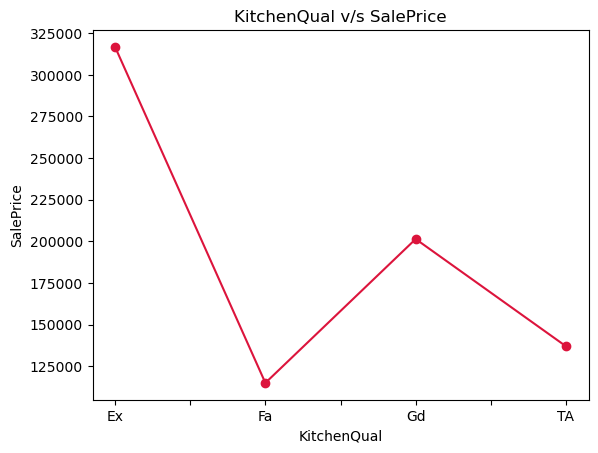

In [75]:
for feature in columns_ordinal:
    df.groupby(feature)["SalePrice"].median().plot(color="crimson",marker="o")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature +" v/s SalePrice")
    plt.show()

In [76]:
categories_ranking=[
    ["Rare_Feature","Abnorml","Family","Normal","Partial"], #--SaleCondition
    ["COD","Rare_Feature","WD","New"], #---SaleType
    ["N","P","Y"], #--PaveDrive
    ["Missing","Unf","RFn","Fin"], #--GarageFinish
    ["Missing","Po","Fa","TA","Gd","Ex"], #--FireplaceQu
    ["Rare_Feature","FuseF","FuseA","SBrkr"], #--Electrical
    ["Rare_Feature","Fa","TA","Gd","Ex"], #--HeatingQC
    ["Rare_Feature","GasW","GasA"], #--Heating
    ["Rare_Feature","RM","RH","RL","FV"], #--MSZoning
    ["Bnk","Lvl","Low","HLS"], #--LandContour
    ["Artery","Feedr","Norm","RRAn","Rare_Feature","PosN"], #--Condition1
    ["Rare_Feature","Norm"], #--Condition2
    ["2fmCon","Duplex","Twnhs","1Fam","TwnhsE"], #--BldgType
    ["Rare_Feature","1.5Fin","SFoyer","1Story","SLvl","2Story"], #--HouseStyle
    ["Gable","Hip","Rare_Feature"],  #--RoofStyle
    ["BrkCmn","Missing","BrkFace","Stone"], #--MasVnrType
    ["Rare_Feature","TA","Gd","Ex"],    #--ExterQual
    ["Slab","BrkTil","CBlock","Rare_Feature","PConc"], #--Foundation
    ["Missing","Fa","TA","Gd","Ex"], #--BsmtQual
    ["Rare_Feature","Missing","Fa","TA","Gd"], #--BsmtCond
    ["Missing","No","Mn","Av","Gd"], #--BsmtExposure
    ["Fa","Rare_Feature","TA","Gd"], #--ExterCond
    ["Missing","LwQ","BLQ","Rec","ALQ","Unf","GLQ"], #--BsmtFinType1
    ["Missing","BLQ","Rec","LwQ","Unf","ALQ","Rare_Feature"], #--BsmtFinType2
    ["Fa","TA","Gd","Ex"] #--KitchenQual
]

In [77]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope  Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl       CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl  Rare_Feature      Feedr   
2         Lvl    AllPub    Inside       Gtl       CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl       Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl       NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [78]:
categories_ranking

[['Rare_Feature', 'Abnorml', 'Family', 'Normal', 'Partial'],
 ['COD', 'Rare_Feature', 'WD', 'New'],
 ['N', 'P', 'Y'],
 ['Missing', 'Unf', 'RFn', 'Fin'],
 ['Missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Rare_Feature', 'FuseF', 'FuseA', 'SBrkr'],
 ['Rare_Feature', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Rare_Feature', 'GasW', 'GasA'],
 ['Rare_Feature', 'RM', 'RH', 'RL', 'FV'],
 ['Bnk', 'Lvl', 'Low', 'HLS'],
 ['Artery', 'Feedr', 'Norm', 'RRAn', 'Rare_Feature', 'PosN'],
 ['Rare_Feature', 'Norm'],
 ['2fmCon', 'Duplex', 'Twnhs', '1Fam', 'TwnhsE'],
 ['Rare_Feature', '1.5Fin', 'SFoyer', '1Story', 'SLvl', '2Story'],
 ['Gable', 'Hip', 'Rare_Feature'],
 ['BrkCmn', 'Missing', 'BrkFace', 'Stone'],
 ['Rare_Feature', 'TA', 'Gd', 'Ex'],
 ['Slab', 'BrkTil', 'CBlock', 'Rare_Feature', 'PConc'],
 ['Missing', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Rare_Feature', 'Missing', 'Fa', 'TA', 'Gd'],
 ['Missing', 'No', 'Mn', 'Av', 'Gd'],
 ['Fa', 'Rare_Feature', 'TA', 'Gd'],
 ['Missing', 'LwQ', 'BLQ', 'Rec', 'ALQ', 'Unf', 'GLQ'],
 ['Missing

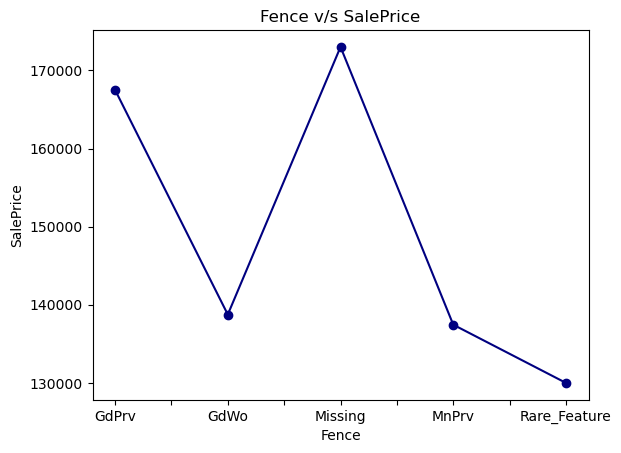

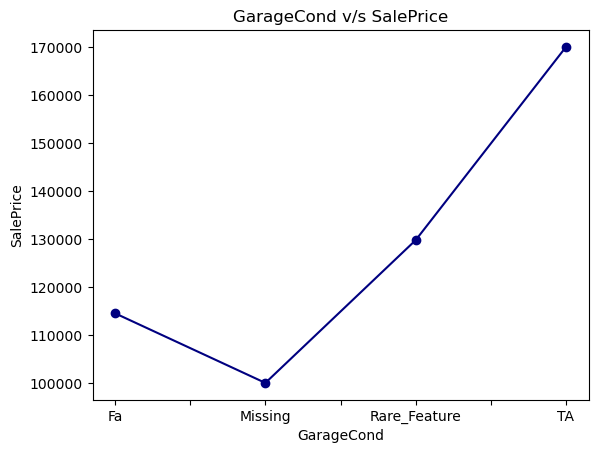

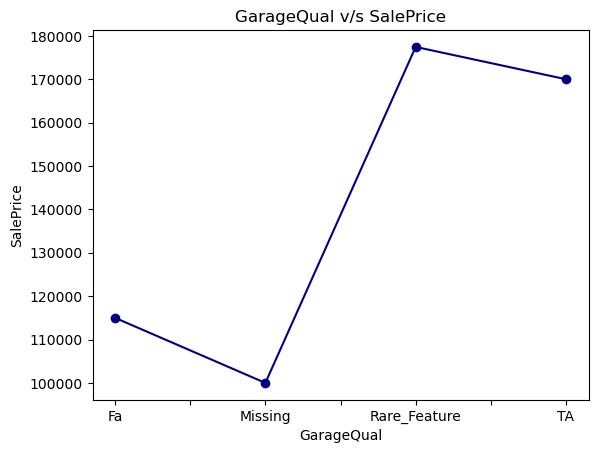

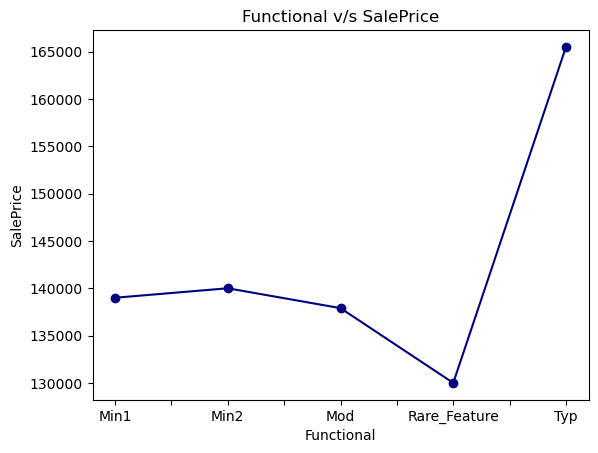

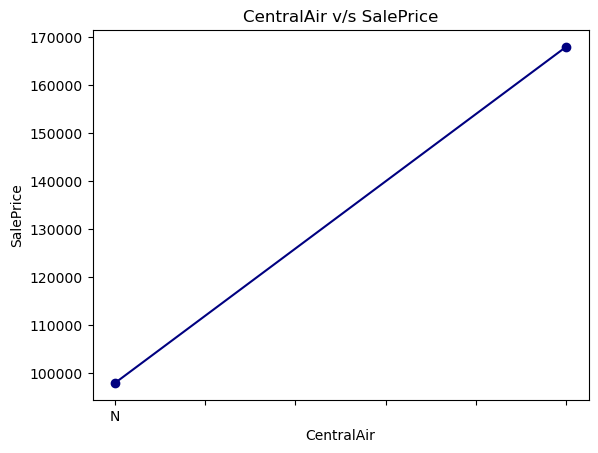

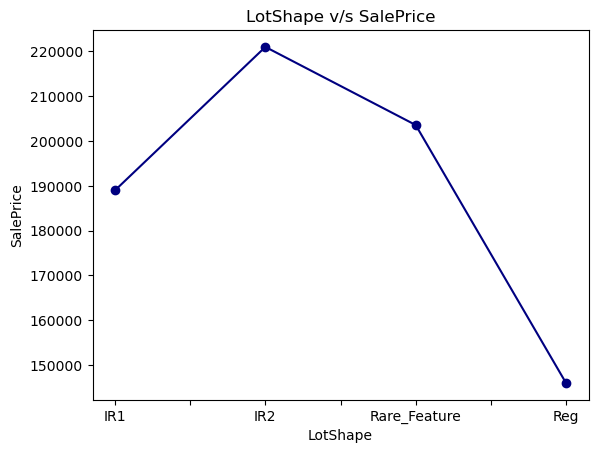

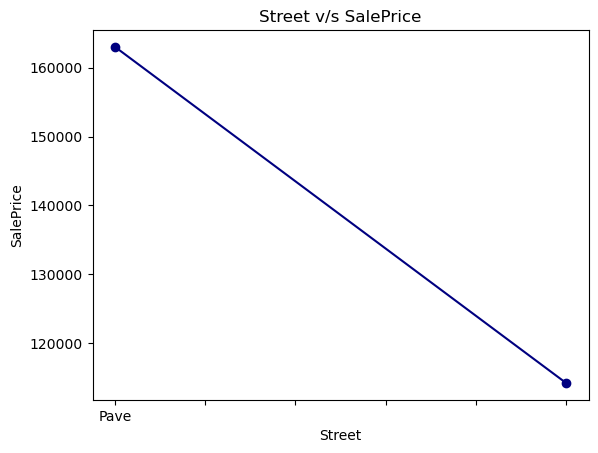

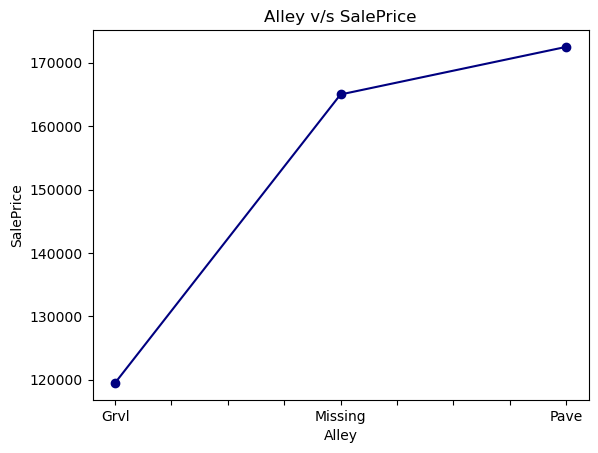

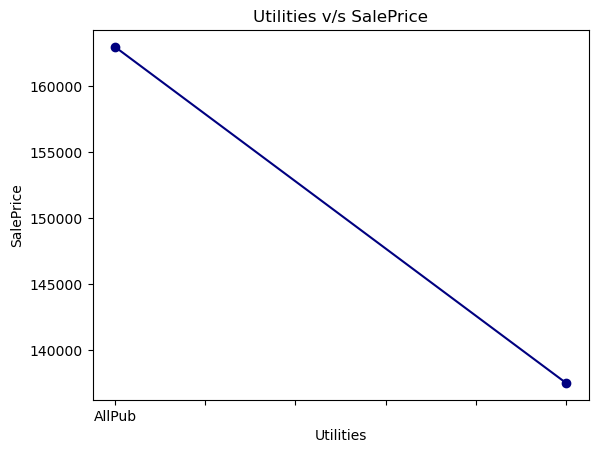

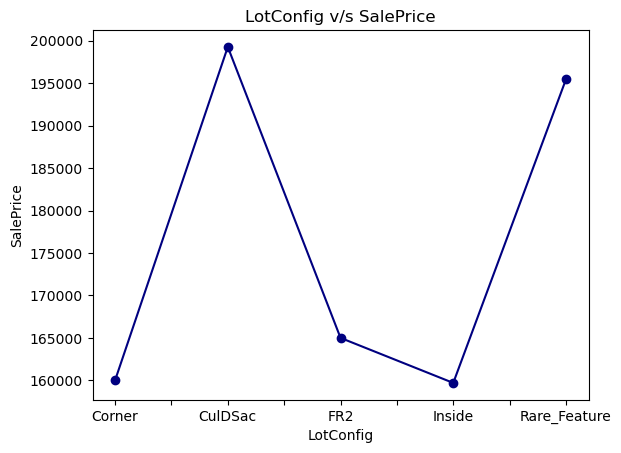

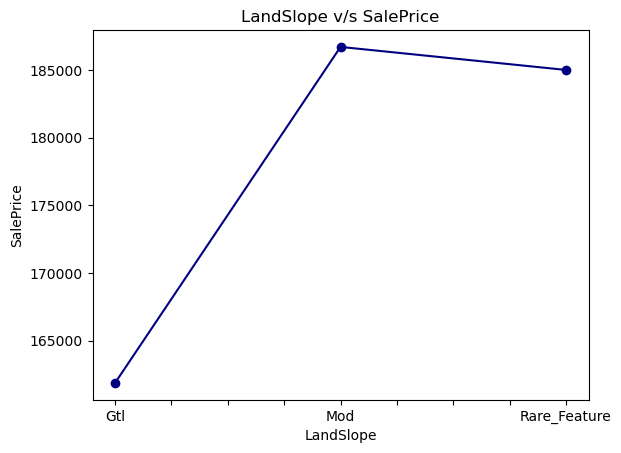

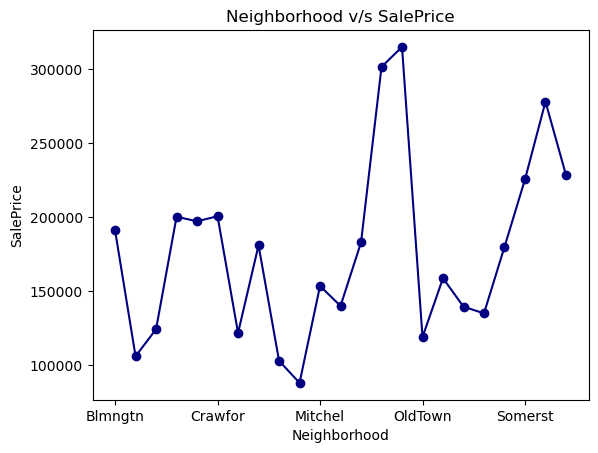

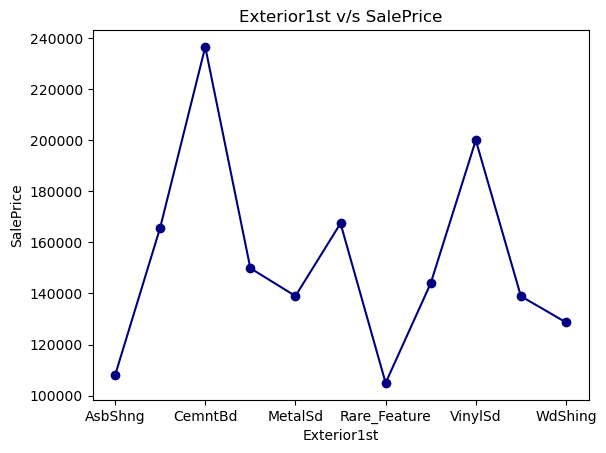

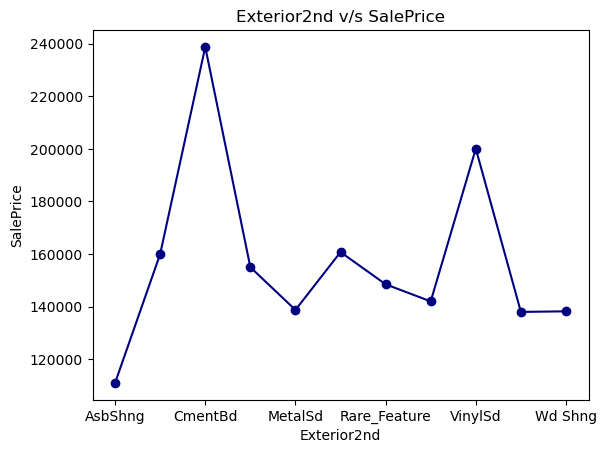

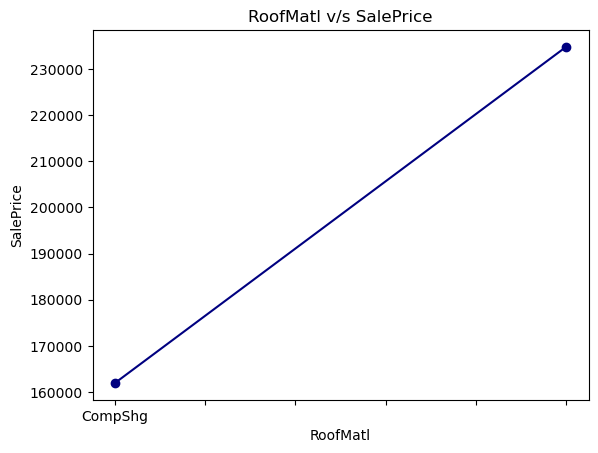

In [79]:
#BASED ON THE PLOTS THAT WE HAVE CREATED NON ORDINAL ENCODING FOR CERTAIN CATEGORICAL FEATURES

columns_non_ordinal = [
    "Fence","GarageCond","GarageQual","Functional",
    "CentralAir","LotShape","Street","Alley","Utilities",
    "LotConfig","LandSlope","Neighborhood","Exterior1st",
    "Exterior2nd","RoofMatl"
]

for feature in columns_non_ordinal:
    df.groupby(feature)["SalePrice"].median().plot(color="navy",marker="o")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature +" v/s SalePrice")
    plt.show()


In [80]:
for col in columns_non_ordinal:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True,dtype=int)
    df = pd.concat([df, dummies], axis=1)

df.drop(columns=columns_non_ordinal, inplace=True)

In [81]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LandContour Condition1  \
0          60       RL         65.0     8450         Lvl       Norm   
1          20       RL         80.0     9600         Lvl      Feedr   
2          60       RL         68.0    11250         Lvl       Norm   
3          70       RL         60.0     9550         Lvl       Norm   
4          60       RL         84.0    14260         Lvl       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle MasVnrType  MasVnrArea ExterQual ExterCond  \
0          2003     Gable    BrkFace       196.0        Gd        TA   
1          1976     Gable    Missing         0.0        TA        TA   
2          2002     Gable    BrkFace       162.0        Gd        TA   
3          1970     Gable    Missing         0.0        TA        TA   
4          2000     Gable    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0             8           0     Missing     Attchd       2003.0          RFn   
1             6           1          TA     Attchd       1976.0          RFn   
2             6           1          TA     Attchd       2001.0          RFn   
3             7           1          Gd     Detchd       1998.0          Unf   
4             9           1          TA     Attchd       2000.0          RFn   

   GarageCars  GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           2         548          Y           0           61              0   
1           2         460          Y         298            0              0   
2           2         608          Y           0           42              0   
3           3         642          Y           0           35            272   
4           3         836      

In [82]:
encoder=OrdinalEncoder(categories=[["Rare_Feature","Abnorml","Family","Normal","Partial"]])
encoded_data=encoder.fit_transform(df[["SaleCondition"]])
df["SaleCondition"]=pd.DataFrame(encoded_data)

In [83]:
encoder=OrdinalEncoder(categories=[["COD","Rare_Feature","WD","New"]])
encoded_data=encoder.fit_transform(df[["SaleType"]])
df["SaleType"]=pd.DataFrame(encoded_data)

In [84]:
encoder=OrdinalEncoder(categories=[["N","P","Y"]])
encoded_data=encoder.fit_transform(df[["PavedDrive"]])
df["PavedDrive"]=pd.DataFrame(encoded_data)

In [85]:
encoder=OrdinalEncoder(categories=[["Missing","Unf","RFn","Fin"]])
encoded_data=encoder.fit_transform(df[["GarageFinish"]])
df["GarageFinish"]=pd.DataFrame(encoded_data)

In [86]:
encoder=OrdinalEncoder(categories=[["Missing","Po","Fa","TA","Gd","Ex"]])
encoded_data=encoder.fit_transform(df[["FireplaceQu"]])
df["FireplaceQu"]=pd.DataFrame(encoded_data)

In [87]:
encoder=OrdinalEncoder(categories=[["Rare_Feature","FuseF","FuseA","SBrkr"]])
encoded_data=encoder.fit_transform(df[["Electrical"]])
df["Electrical"]=pd.DataFrame(encoded_data)

In [88]:
encoder=OrdinalEncoder(categories=[["Rare_Feature","Fa","TA","Gd","Ex"]])
encoded_data=encoder.fit_transform(df[["HeatingQC"]])
df["HeatingQC"]=pd.DataFrame(encoded_data)

In [89]:
encoder=OrdinalEncoder(categories=[["Rare_Feature","GasW","GasA"]])
encoded_data=encoder.fit_transform(df[["Heating"]])
df["Heating"]=pd.DataFrame(encoded_data)

In [90]:
encoder=OrdinalEncoder(categories=[["Rare_Feature","RM","RH","RL","FV"]])
encoded_data=encoder.fit_transform(df[["MSZoning"]])
df["MSZoning"]=pd.DataFrame(encoded_data)

In [91]:
encoder=OrdinalEncoder(categories=[["Bnk","Lvl","Low","HLS"]])
encoded_data=encoder.fit_transform(df[["LandContour"]])
df["LandContour"]=pd.DataFrame(encoded_data)

In [92]:
encoder=OrdinalEncoder(categories=[["Artery","Feedr","Norm","RRAn","Rare_Feature","PosN"]])
encoded_data=encoder.fit_transform(df[["Condition1"]])
df["Condition1"]=pd.DataFrame(encoded_data)


In [93]:
encoder=OrdinalEncoder(categories=[["Rare_Feature","Norm"]])
encoded_data=encoder.fit_transform(df[["Condition2"]])
df["Condition2"]=pd.DataFrame(encoded_data)

In [94]:
encoder=OrdinalEncoder(categories=[["2fmCon","Duplex","Twnhs","1Fam","TwnhsE"]])
encoded_data=encoder.fit_transform(df[["BldgType"]])
df["BldgType"]=pd.DataFrame(encoded_data)

In [95]:
encoder=OrdinalEncoder(categories=[["Rare_Feature","1.5Fin","SFoyer","1Story","SLvl","2Story"]])
encoded_data=encoder.fit_transform(df[["HouseStyle"]])
df["HouseStyle"]=pd.DataFrame(encoded_data)

In [96]:
encoder=OrdinalEncoder(categories=[["Gable","Hip","Rare_Feature"]])
encoded_data=encoder.fit_transform(df[["RoofStyle"]])
df["RoofStyle"]=pd.DataFrame(encoded_data)

In [97]:
encoder=OrdinalEncoder(categories=[["BrkCmn","Missing","BrkFace","Stone"]])
encoded_data=encoder.fit_transform(df[["MasVnrType"]])
df["MasVnrType"]=pd.DataFrame(encoded_data)

In [98]:

encoder=OrdinalEncoder(categories=[["Slab","BrkTil","CBlock","Rare_Feature","PConc"]])
encoded_data=encoder.fit_transform(df[["Foundation"]])
df["Foundation"]=pd.DataFrame(encoded_data)

In [99]:
encoder=OrdinalEncoder(categories=[["Rare_Feature","Missing","Fa","TA","Gd"]])
encoded_data=encoder.fit_transform(df[["BsmtCond"]])
df["BsmtCond"]=pd.DataFrame(encoded_data)

In [100]:
encoder=OrdinalEncoder(categories=[["Missing","No","Mn","Av","Gd"]])
encoded_data=encoder.fit_transform(df[["BsmtExposure"]])
df["BsmtExposure"]=pd.DataFrame(encoded_data)

In [101]:
encoder=OrdinalEncoder(categories=[["Fa","Rare_Feature","TA","Gd"]])
encoded_data=encoder.fit_transform(df[["ExterCond"]])
df["ExterCond"]=pd.DataFrame(encoded_data)

In [102]:
encoder=OrdinalEncoder(categories=[["Missing","LwQ","BLQ","Rec","ALQ","Unf","GLQ"]])
encoded_data=encoder.fit_transform(df[["BsmtFinType1"]])
df["BsmtFinType1"]=pd.DataFrame(encoded_data)

In [103]:
encoder=OrdinalEncoder(categories=[["Missing","BLQ","Rec","LwQ","Unf","ALQ","Rare_Feature"]])
encoded_data=encoder.fit_transform(df[["BsmtFinType2"]])
df["BsmtFinType2"]=pd.DataFrame(encoded_data)

In [104]:
encoder=OrdinalEncoder(categories=[["Fa","TA","Gd","Ex"]])
encoded_data=encoder.fit_transform(df[["KitchenQual"]])
df["KitchenQual"]=pd.DataFrame(encoded_data)

In [105]:
encoder=OrdinalEncoder(categories=[["Rare_Feature","TA","Gd","Ex"]])
encoded_data=encoder.fit_transform(df[["ExterQual"]])
df["ExterQual"]=pd.DataFrame(encoded_data)

In [106]:
encoder=OrdinalEncoder(categories=[["Missing","Rare_Feature","Detchd","Basment","Attchd","BuiltIn"]])
encoded_data=encoder.fit_transform(df[["GarageType"]])
df["GarageType"]=pd.DataFrame(encoded_data)

In [107]:
encoder=OrdinalEncoder(categories=[["Missing","Fa","TA","Gd","Ex"]])
encoded_data=encoder.fit_transform(df[["BsmtQual"]])
df["BsmtQual"]=pd.DataFrame(encoded_data)

In [108]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  LandContour  Condition1  \
0          60       3.0         65.0     8450          1.0         2.0   
1          20       3.0         80.0     9600          1.0         1.0   
2          60       3.0         68.0    11250          1.0         2.0   
3          70       3.0         60.0     9550          1.0         2.0   
4          60       3.0         84.0    14260          1.0         2.0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0       3.0         5.0            7            5       2003   
1         1.0       3.0         3.0            6            8       1976   
2         1.0       3.0         5.0            7            5       2001   
3         1.0       3.0         5.0            7            5       1915   
4         1.0       3.0         5.0            8            5       2000   

   YearRemodAdd  RoofStyle  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0          2003        0.0         2.0       196.0        2.0        2.0   
1          1976        0.0         1.0         0.0        1.0        2.0   
2          2002        0.0         2.0       162.0        2.0        2.0   
3          1970        0.0         1.0         0.0        1.0        2.0   
4          2000        0.0         2.0       350.0        2.0        2.0   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0         4.0       3.0       3.0           1.0           6.0         706   
1         2.0       3.0       3.0           4.0           4.0         978   
2         4.0       3.0       3.0           2.0           6.0         486   
3         1.0       2.0       4.0           1.0           4.0         216   
4         4.0       3.0       3.0           3.0           6.0         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0           4.0           0        150          856      2.0        4.0   
1           4.0           0        284         1262      2.0        4.0   
2           4.0           0        434          920      2.0        4.0   
3           4.0           0        540          756      2.0        3.0   
4           4.0           0        490         1145      2.0        4.0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         3.0       856       854             0       1710             1   
1         3.0      1262         0             0       1262             0   
2         3.0       920       866             0       1786             1   
3         3.0       961       756             0       1717             1   
4         3.0      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1          2.0   
1             1         2         0             3             1          1.0   
2             0         2         1             3             1          2.0   
3             0         1         0             3             1          2.0   
4             0         2         1             4             1          2.0   

   TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  \
0             8           0          0.0         4.0       2003.0   
1             6           1          3.0         4.0       1976.0   
2             6           1          3.0         4.0       2001.0   
3             7           1          4.0         2.0       1998.0   
4             9           1          3.0         4.0       2000.0   

   GarageFinish  GarageCars  GarageArea  PavedDrive  WoodDeckSF  OpenPorchSF  \
0           2.0           2         548         2.0           0           61   
1           2.0           2         460         2.0         298            0   
2           2.0           2         608         2.0           0           42   
3           1.0           3         642         2.0      

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 145 entries, MSSubClass to RoofMatl_Rare_Feature
dtypes: float64(35), int64(109), object(1)
memory usage: 1.6+ MB


In [110]:
df["MiscFeature"].value_counts()

MiscFeature
Missing         1406
Shed              49
Rare_Feature       5
Name: count, dtype: int64

In [111]:
#WE HAVE DROPPED MISC_FEATURE BECAUSE OF THE MAXIMUM VALUES IN THE COLUMN HAVING LABEL MISSING AND THEY HAVE NO MEANINGFUL ADDITION TO THE SALE PRICE
df.drop("MiscFeature",axis=1,inplace=True)

In [112]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  LandContour  Condition1  \
0          60       3.0         65.0     8450          1.0         2.0   
1          20       3.0         80.0     9600          1.0         1.0   
2          60       3.0         68.0    11250          1.0         2.0   
3          70       3.0         60.0     9550          1.0         2.0   
4          60       3.0         84.0    14260          1.0         2.0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0       3.0         5.0            7            5       2003   
1         1.0       3.0         3.0            6            8       1976   
2         1.0       3.0         5.0            7            5       2001   
3         1.0       3.0         5.0            7            5       1915   
4         1.0       3.0         5.0            8            5       2000   

   YearRemodAdd  RoofStyle  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0          2003        0.0         2.0       196.0        2.0        2.0   
1          1976        0.0         1.0         0.0        1.0        2.0   
2          2002        0.0         2.0       162.0        2.0        2.0   
3          1970        0.0         1.0         0.0        1.0        2.0   
4          2000        0.0         2.0       350.0        2.0        2.0   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0         4.0       3.0       3.0           1.0           6.0         706   
1         2.0       3.0       3.0           4.0           4.0         978   
2         4.0       3.0       3.0           2.0           6.0         486   
3         1.0       2.0       4.0           1.0           4.0         216   
4         4.0       3.0       3.0           3.0           6.0         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0           4.0           0        150          856      2.0        4.0   
1           4.0           0        284         1262      2.0        4.0   
2           4.0           0        434          920      2.0        4.0   
3           4.0           0        540          756      2.0        3.0   
4           4.0           0        490         1145      2.0        4.0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         3.0       856       854             0       1710             1   
1         3.0      1262         0             0       1262             0   
2         3.0       920       866             0       1786             1   
3         3.0       961       756             0       1717             1   
4         3.0      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1          2.0   
1             1         2         0             3             1          1.0   
2             0         2         1             3             1          2.0   
3             0         1         0             3             1          2.0   
4             0         2         1             4             1          2.0   

   TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  \
0             8           0          0.0         4.0       2003.0   
1             6           1          3.0         4.0       1976.0   
2             6           1          3.0         4.0       2001.0   
3             7           1          4.0         2.0       1998.0   
4             9           1          3.0         4.0       2000.0   

   GarageFinish  GarageCars  GarageArea  PavedDrive  WoodDeckSF  OpenPorchSF  \
0           2.0           2         548         2.0           0           61   
1           2.0           2         460         2.0         298            0   
2           2.0           2         608         2.0           0           42   
3           1.0           3         642         2.0      

In [113]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'HouseAge',
 'GarageAge',
 'YearSinceRemod',
 'IsHouseRemod',
 'HighDemandMonth',
 'MonthSin',
 'MonthCos',
 'HighDemandMonthPrice',
 'SaleTypeSalePrice',
 'ExterCondEncoded']

In [114]:
#WE WILL HAVE TO DO STANDARD SCALING OF OUR NUMERICAL COLUMNS USING PYTHON LIBRARY
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

In [115]:
#AFTER SCALING PLOTTING HISTOGRAM FOR CONTINUOUS FEATURES TO CHECK FOR THE DISTRIBUTION
continuous_columns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

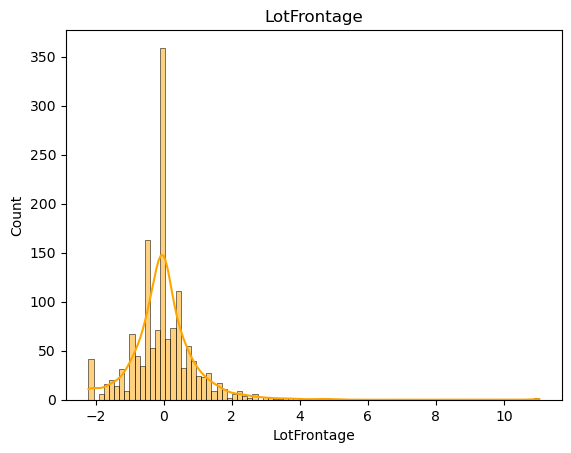

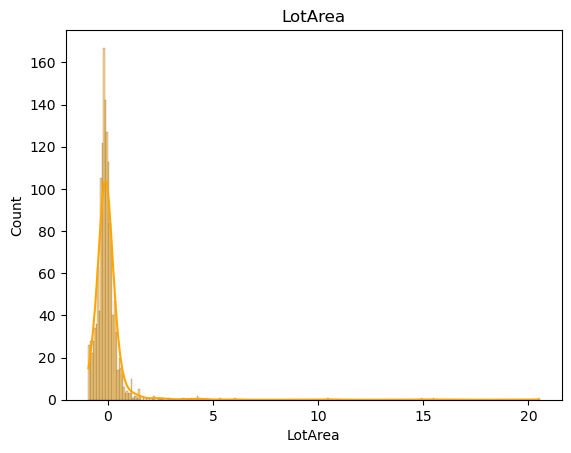

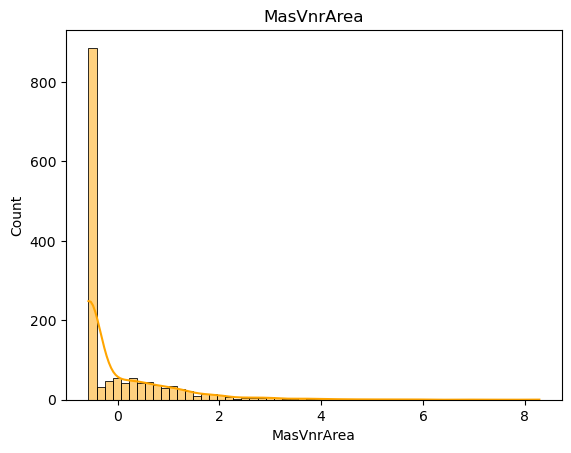

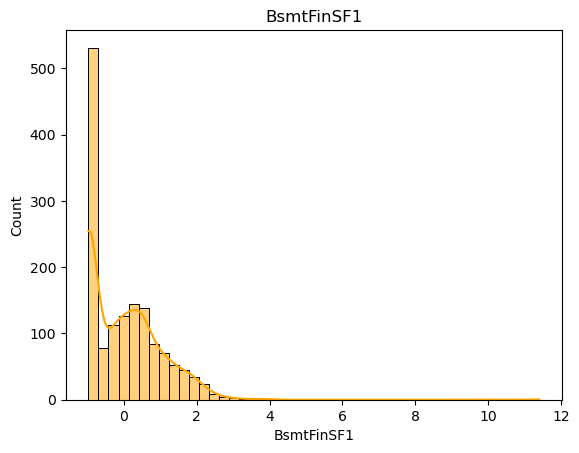

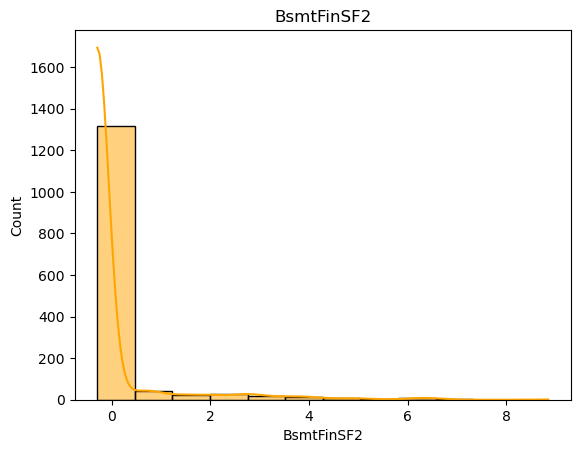

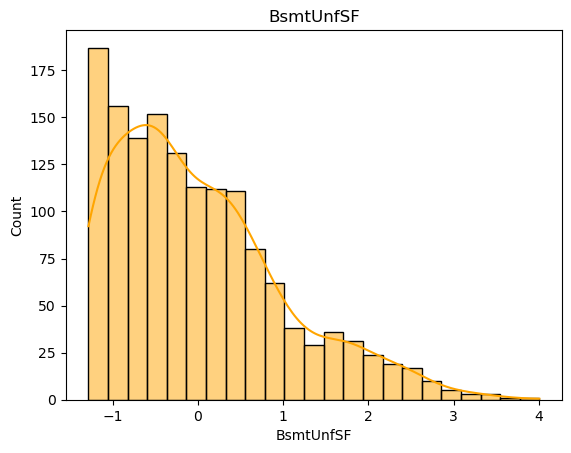

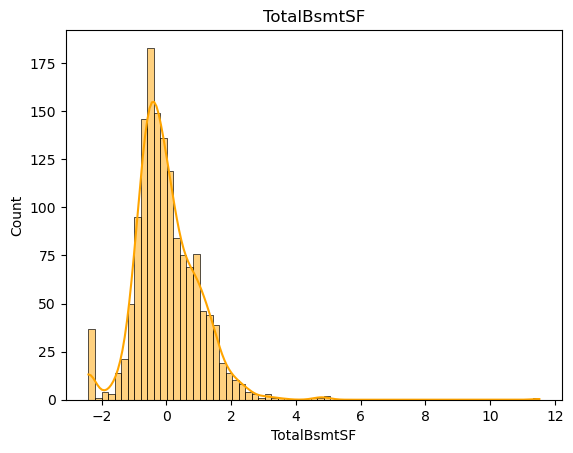

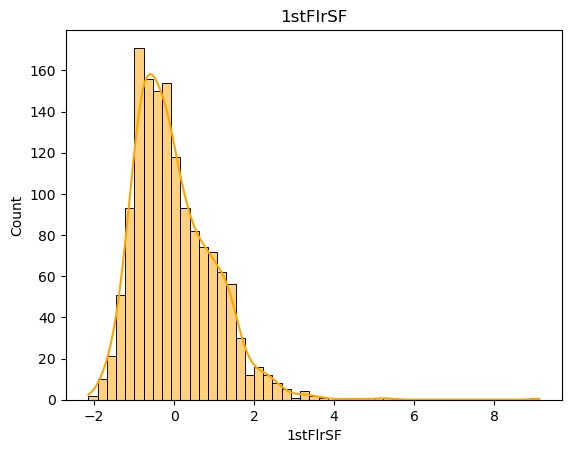

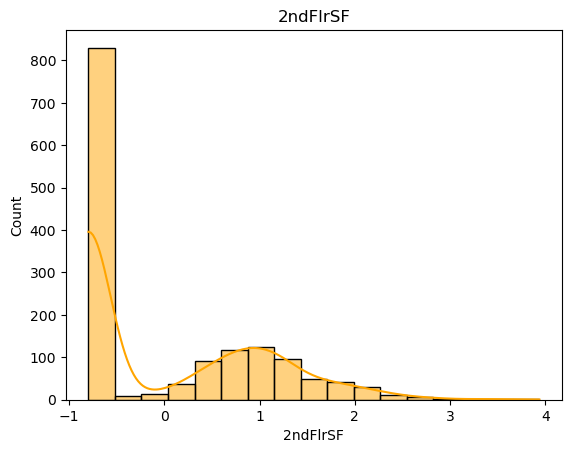

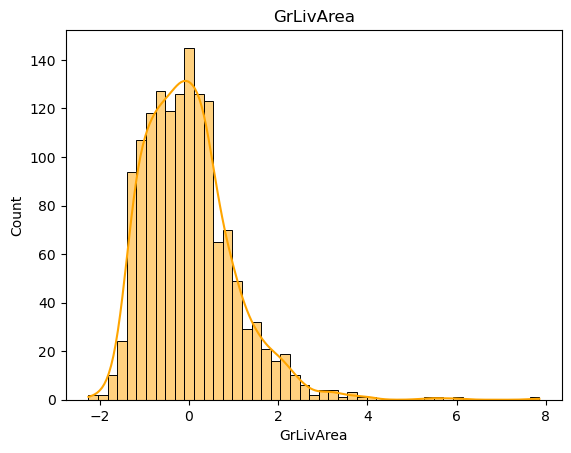

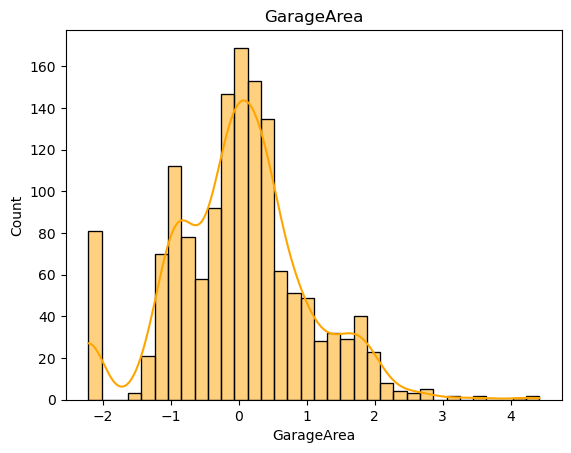

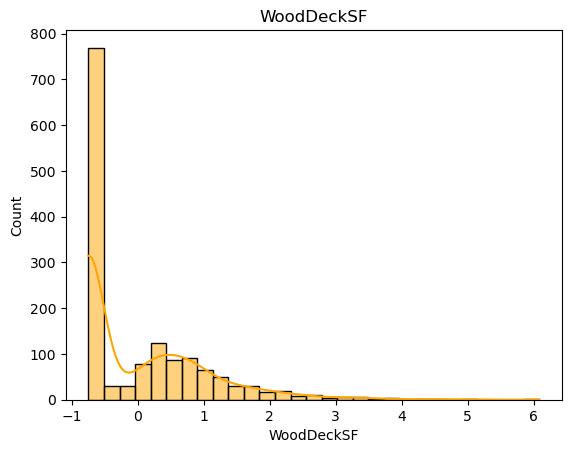

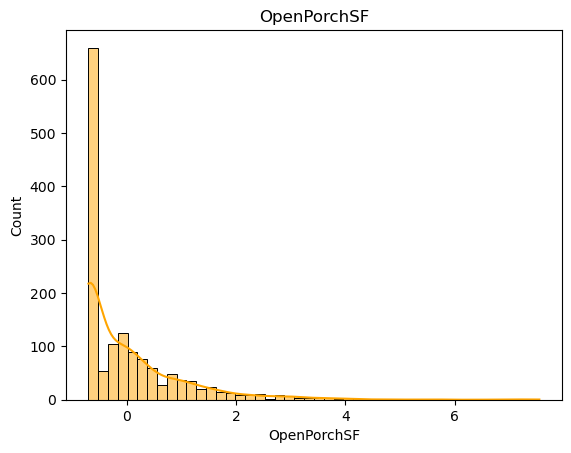

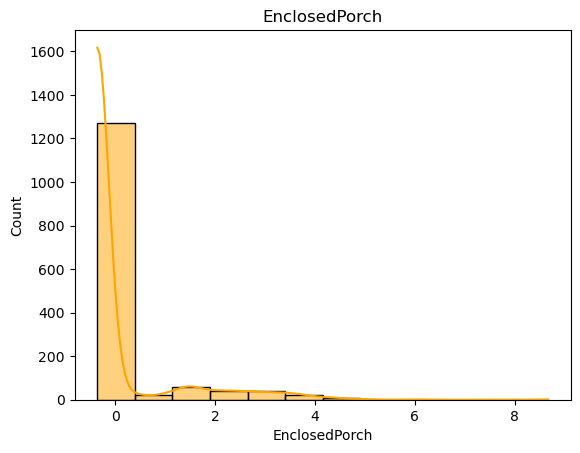

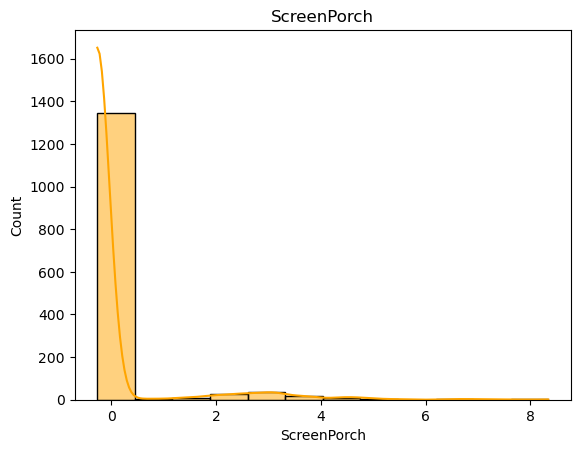

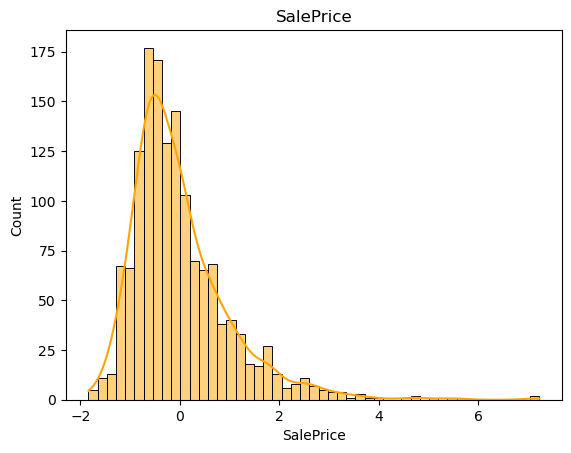

In [116]:
for feature in continuous_columns:
    sns.histplot(df[feature],color="orange",kde=True,edgecolor="black")
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [117]:
X=df.drop(columns=["SalePrice"])
y=df["SalePrice"]

In [118]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LandContour  Condition1  \
0    0.073375       3.0    -0.220875 -0.207142          1.0         2.0   
1   -0.872563       3.0     0.460320 -0.091886          1.0         1.0   
2    0.073375       3.0    -0.084636  0.073480          1.0         2.0   
3    0.309859       3.0    -0.447940 -0.096897          1.0         2.0   
4    0.073375       3.0     0.641972  0.375148          1.0         2.0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0       3.0         5.0     0.651479    -0.517200   1.050994   
1         1.0       3.0         3.0    -0.071836     2.179628   0.156734   
2         1.0       3.0         5.0     0.651479    -0.517200   0.984752   
3         1.0       3.0         5.0     0.651479    -0.517200  -1.863632   
4         1.0       3.0         5.0     1.374795    -0.517200   0.951632   

   YearRemodAdd  RoofStyle  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0      0.878668        0.0         2.0    0.514104        2.0        2.0   
1     -0.429577        0.0         1.0   -0.570750        1.0        2.0   
2      0.830215        0.0         2.0    0.325915        2.0        2.0   
3     -0.720298        0.0         1.0   -0.570750        1.0        2.0   
4      0.733308        0.0         2.0    1.366489        2.0        2.0   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0         4.0       3.0       3.0           1.0           6.0    0.575425   
1         2.0       3.0       3.0           4.0           4.0    1.171992   
2         4.0       3.0       3.0           2.0           6.0    0.092907   
3         1.0       2.0       4.0           1.0           4.0   -0.499274   
4         4.0       3.0       3.0           3.0           6.0    0.463568   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0           4.0   -0.288653  -0.944591    -0.459303      2.0        4.0   
1           4.0   -0.288653  -0.641228     0.466465      2.0        4.0   
2           4.0   -0.288653  -0.301643    -0.313369      2.0        4.0   
3           4.0   -0.288653  -0.061670    -0.687324      2.0        3.0   
4           4.0   -0.288653  -0.174865     0.199680      2.0        4.0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         3.0 -0.793434  1.161852     -0.120242   0.370333      1.107810   
1         3.0  0.257140 -0.795163     -0.120242  -0.482512     -0.819964   
2         3.0 -0.627826  1.189351     -0.120242   0.515013      1.107810   
3         3.0 -0.521734  0.937276     -0.120242   0.383659      1.107810   
4         3.0 -0.045611  1.617877     -0.120242   1.299326      1.107810   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0     -0.241061  0.789741  1.227585      0.163779     -0.211454          2.0   
1      3.948809  0.789741 -0.761621      0.163779     -0.211454          1.0   
2     -0.241061  0.789741  1.227585      0.163779     -0.211454          2.0   
3     -0.241061 -1.026041 -0.761621      0.163779     -0.211454          2.0   
4     -0.241061  0.789741  1.227585      1.390023     -0.211454          2.0   

   TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  \
0      0.912210   -0.951226          0.0         4.0     1.017598   
1     -0.318683    0.600495          3.0         4.0    -0.107927   
2     -0.318683    0.600495          3.0         4.0     0.934226   
3      0.296763    0.600495          4.0         2.0     0.809167   
4      1.527656    0.600495          3.0         4.0     0.892540   

   GarageFinish  GarageCars  GarageArea  PavedDrive  WoodDeckSF  OpenPorchSF  \
0           2.0    0.311725    0.351000         2.0   -0.752176     0.216503   
1           2.0    0.311725   -0.060731         2.0    1.626195    -0.704483   
2           2.0    0.311725    0.631726         2.0   -0.752176    -0.070361   
3           1.0    1.650307    0.790804         2.0

In [119]:
y.head()

0    0.347273
1    0.007288
2    0.536154
3   -0.515281
4    0.869843
Name: SalePrice, dtype: float64

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 143)
(292, 143)
(1168,)
(292,)


In [121]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LandContour  Condition1  \
254    -0.872563       3.0     0.006190 -0.212153          1.0         2.0   
1066    0.073375       3.0    -0.493353 -0.268578          1.0         2.0   
638    -0.636078       3.0    -0.130049 -0.174369          1.0         1.0   
799    -0.163109       3.0    -0.447940 -0.332419          1.0         1.0   
380    -0.163109       3.0    -0.902070 -0.552908          1.0         2.0   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
254          1.0       3.0         3.0    -0.795151     0.381743  -0.472560   
1066         1.0       3.0         5.0    -0.071836     1.280685   0.719786   
638          1.0       3.0         3.0    -0.795151     1.280685  -2.029235   
799          1.0       3.0         1.0    -0.795151     1.280685  -1.134975   
380          1.0       3.0         1.0    -0.795151     0.381743  -1.565545   

      YearRemodAdd  RoofStyle  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
254      -1.350194        0.0         1.0   -0.570750        1.0        3.0   
1066      0.442586        0.0         1.0   -0.570750        2.0        2.0   
638      -1.689368        0.0         1.0   -0.570750        1.0        2.0   
799      -1.689368        0.0         2.0    0.824062        1.0        2.0   
380      -1.689368        0.0         1.0   -0.570750        1.0        2.0   

      Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
254          2.0       2.0       3.0           1.0           3.0    1.049169   
1066         4.0       3.0       3.0           1.0           5.0   -0.973018   
638          2.0       1.0       3.0           1.0           5.0   -0.973018   
799          1.0       3.0       3.0           1.0           4.0    0.274948   
380          1.0       2.0       3.0           1.0           1.0   -0.494887   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
254            4.0   -0.288653  -0.396727     0.585036      2.0        2.0   
1066           4.0   -0.288653   0.524681    -0.589275      2.0        3.0   
638            4.0   -0.288653   0.517889    -0.596115      2.0        3.0   
799            4.0   -0.288653  -0.917424    -0.744329      2.0        4.0   
380            4.0   -0.288653   0.545056    -0.071666      2.0        2.0   

      Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
254          3.0  0.391697 -0.795163     -0.120242  -0.383521      1.107810   
1066         3.0 -0.940928  0.973941     -0.120242   0.105723     -0.819964   
638          2.0 -0.948691 -0.795163     -0.120242  -1.369623     -0.819964   
799          3.0 -0.469981  1.008315     -0.120242   0.480746      1.107810   
380          3.0 -0.353538  0.728742     -0.120242   0.334164     -0.819964   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
254      -0.241061 -1.026041 -0.761621      0.163779     -0.211454   
1066     -0.241061  0.789741  1.227585      0.163779     -0.211454   
638      -0.241061 -1.026041 -0.761621     -1.062465     -0.211454   
799      -0.241061 -1.026041  1.227585      0.163779     -0.211454   
380      -0.241061  0.789741 -0.761621      0.163779     -0.211454   

      KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageType  \
254           1.0     -0.934130   -0.951226          0.0         4.0   
1066          1.0      0.296763    0.600495          3.0         4.0   
638           1.0     -1.549576   -0.951226          0.0         0.0   
799           2.0      0.296763    2.152216          3.0         2.0   
380           2.0     -0.318683    0.600495          4.0         2.0   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  PavedDrive  \
254     -0.899963           2.0   -1.026858   -0.837406         2.0   
1066     0.600737           2.0    0.311725   -0.435032         2.0   
638      0.058817           0.0   -2.365440   -2.212963         1.0   
799     -1.650313       

In [122]:
X_test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LandContour  Condition1  \
892    -0.872563       3.0     0.006190 -0.210750          1.0         2.0   
1105    0.073375       3.0     1.277754  0.174303          1.0         2.0   
413    -0.636078       1.0    -0.629592 -0.156028          1.0         0.0   
522    -0.163109       1.0    -0.902070 -0.552908          1.0         1.0   
1036   -0.872563       3.0     0.869037  0.238646          3.0         2.0   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
892          1.0       3.0         3.0    -0.071836     2.179628  -0.273836   
1105         1.0       3.0         5.0     1.374795    -0.517200   0.752907   
413          1.0       3.0         3.0    -0.795151     0.381743  -1.466183   
522          1.0       3.0         1.0    -0.071836     1.280685  -0.803768   
1036         1.0       3.0         3.0     2.098110    -0.517200   1.183477   

      YearRemodAdd  RoofStyle  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
892       0.878668        1.0         1.0   -0.570750        1.0        2.0   
1105      0.491040        0.0         2.0    1.432909        2.0        2.0   
413      -1.689368        0.0         1.0   -0.570750        1.0        2.0   
522      -1.689368        0.0         1.0   -0.570750        1.0        3.0   
1036      1.120936        1.0         3.0   -0.183302        2.0        2.0   

      Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
892          2.0       2.0       3.0           1.0           6.0    0.481115   
1105         4.0       4.0       3.0           3.0           6.0    1.290428   
413          2.0       2.0       3.0           1.0           5.0   -0.973018   
522          2.0       2.0       3.0           1.0           4.0   -0.097907   
1036         4.0       4.0       3.0           4.0           6.0    1.268496   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
892            4.0   -0.288653  -0.387671     0.003581      2.0        2.0   
1105           4.0   -0.288653  -0.308435     0.924788      2.0        4.0   
413            4.0   -0.288653   0.997836    -0.112710      2.0        3.0   
522            4.0   -0.288653   0.085484    -0.121831      2.0        4.0   
1036           4.0   -0.288653   0.069637     1.282782      2.0        4.0   

      Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
892          3.0 -0.244858 -0.795163     -0.120242  -0.851824     -0.819964   
1105         3.0  0.872994  1.775997     -0.120242   2.106483      1.107810   
413          2.0 -0.348363 -0.795163     -0.120242  -0.927971     -0.819964   
522          3.0 -0.410466  0.717284     -0.120242   0.282764     -0.819964   
1036         3.0  1.183509 -0.795163     -0.120242   0.199003      1.107810   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
892       3.948809 -1.026041 -0.761621      0.163779     -0.211454   
1105     -0.241061  0.789741  1.227585      0.163779     -0.211454   
413      -0.241061 -1.026041 -0.761621     -1.062465     -0.211454   
522      -0.241061  0.789741 -0.761621      0.163779     -0.211454   
1036     -0.241061  0.789741 -0.761621     -1.062465     -0.211454   

      KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageType  \
892           1.0     -0.318683   -0.951226          0.0         4.0   
1105          2.0      1.527656    2.152216          3.0         4.0   
413           1.0     -0.934130    0.600495          4.0         2.0   
522           1.0      0.296763    2.152216          4.0         2.0   
1036          3.0     -0.318683    0.600495          5.0         4.0   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  PavedDrive  \
892     -0.649847           2.0   -1.026858   -0.977769         2.0   
1105     0.642423           2.0    0.311725    1.118318         2.0   
413     -2.150547           1.0    0.311725   -0.528608         2.0   
522     -1.191766       

In [123]:
#SINCE THE OUTPUT FEATURE IS "SALEPRICE"---THIS IS A CLASSIC REGRESSION PROBLEM
#WE WILL USE LINEAR REGRESSION TO MAKE PREDICTION

In [124]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [125]:
y_pred=regression.predict(X_test)

In [126]:
y_pred

array([-3.84512174e-01,  1.97282151e+00, -9.88934964e-01,  2.34555427e-02,
        1.62022054e+00, -1.30286715e+00,  7.82302550e-01, -7.34039061e-02,
       -1.23015475e+00, -5.39636885e-01, -4.35437162e-01, -1.01879037e+00,
       -1.57363647e+00,  7.39967645e-01, -2.05934751e-01, -5.50033792e-01,
        1.77718856e-01, -7.44555738e-01, -5.34141249e-01,  5.39346523e-01,
       -2.91107186e-01,  4.24443601e-01, -4.59634678e-02, -6.47066696e-01,
        3.60612519e-01, -6.24992234e-01,  2.26454816e-01, -1.17110868e+00,
       -1.97480086e-01,  1.12319983e-01, -1.10851667e+00,  1.44512865e+00,
        3.53620546e-01, -1.07318093e+00,  8.48804413e-01, -4.88535627e-01,
       -6.21119536e-01,  4.05136867e-01,  1.68494539e+00, -9.59473936e-01,
       -4.27370695e-01,  7.68402143e-01, -1.07681076e+00,  1.85850077e+00,
       -7.22448810e-01, -6.94051673e-01, -1.05186010e+00, -6.81239201e-01,
        2.64838074e+00, -7.29591127e-01, -8.49832737e-01,  6.34497269e-01,
       -9.99151347e-01,  

In [127]:
y_test

892    -0.332697
1105    1.814245
413    -0.830082
522    -0.276032
1036    1.694621
          ...   
479    -1.151544
1361    0.995763
802     0.101729
651    -0.918226
722    -0.710458
Name: SalePrice, Length: 292, dtype: float64

In [128]:
#CALCULATING R2score for performance metrics

r2=r2_score(y_test,y_pred)

In [129]:
print("THE R2 SCORE IS: ",r2)

THE R2 SCORE IS:  0.8553565543225204


In [130]:
#THE R2 SCORE COMES OUT TO BE 0.855